In [1]:
import numpy as np
from PIL import Image


shape = 32

train_path = "dataset/train.csv"
val_path = "dataset/val.csv"
test_path = "dataset/test.csv"
resize_to = (shape, shape)
x_train = []
x_validation = []
x_test = []
y_train = []
y_validation = []
y_test = []

with open(train_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)
        data = np.asarray(image)
        x_train.append(data)
        y_train.append(slip_data[1])
x_train = np.array(x_train)
y_train = np.array(y_train)

with open(val_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_validation.append(data)
        y_validation.append(slip_data[1])
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)



with open(test_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        if data.shape == (shape, shape, 3):
            x_test.append(data)
            y_test.append(slip_data[1])
        else:
            print(f"Image {image_path} has an unexpected shape: {data.shape}")
x_test = np.array(x_test)
y_test = np.array(y_test)





x_train = x_train.reshape(x_train.shape[0],-1) /255.0
x_validation = x_validation.reshape(x_validation.shape[0],-1) /255.0
x_test = x_test.reshape(x_test.shape[0],-1) /255.0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

y_train = y_train.astype(int)
y_train = one_hot(y_train)

y_validation = y_validation.astype(int)
y_validation = one_hot(y_validation)

y_test = y_test.astype(int)
y_test = one_hot(y_test)


print(x_train.shape, y_train.shape)

print(x_validation.shape,y_validation.shape)

print(x_test.shape,y_test.shape)


Image dataset/test/corn/corn997.jpg has an unexpected shape: (32, 32)
(7000, 3072) (7000, 10)
(1000, 3072) (1000, 10)
(1999, 3072) (1999, 10)


In [1]:
from MLP_autograd import *
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train /255.0
x_test = x_test /255.0
x_validation = x_train[:6000]
y_validation = y_train[:6000]
x_train = x_train[6000:]
y_train = y_train[6000:]

x_validation = x_validation.reshape(x_validation.shape[0],-1)
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)


def one_hot(Y):
  one_hot_Y = np.zeros((Y.size,np.max(Y) + 1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  return one_hot_Y

y_train = one_hot(y_train)
y_validation = one_hot(y_validation)
y_test = one_hot(y_test)


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_validation.shape,y_validation.shape)


(54000, 784) (54000, 10)
(10000, 784) (10000, 10)
(6000, 784) (6000, 10)


In [2]:
nn = NeuralNetwork(layers_size=[28*28, 10],activations = ["softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train, x_validation, y_validation, epochs=1001, batch_size=128)
nn.test(x_test,y_test)

0 loss:  10.189996691752748 Accuracy train:  0.078125 Accuracy validation:  0.0685
100 loss:  0.8361323297530706 Accuracy train:  0.84375 Accuracy validation:  0.782
200 loss:  0.6703487054163441 Accuracy train:  0.8984375 Accuracy validation:  0.8365
300 loss:  0.6082156932429406 Accuracy train:  0.90625 Accuracy validation:  0.8556666666666667
400 loss:  0.5672659525412593 Accuracy train:  0.9140625 Accuracy validation:  0.8675
500 loss:  0.5345823896576796 Accuracy train:  0.921875 Accuracy validation:  0.874
600 loss:  0.507143592252206 Accuracy train:  0.921875 Accuracy validation:  0.8773333333333333
700 loss:  0.4840036963303526 Accuracy train:  0.921875 Accuracy validation:  0.881
800 loss:  0.46447443000970445 Accuracy train:  0.9296875 Accuracy validation:  0.8823333333333333
900 loss:  0.4479618238408157 Accuracy train:  0.9296875 Accuracy validation:  0.886
1000 loss:  0.4339525344203724 Accuracy train:  0.921875 Accuracy validation:  0.8891666666666667


0.8898

In [3]:
nn = NeuralNetwork(layers_size=[28*28,64, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

0 loss:  12.305059091883892 Accuracy train:  0.109375 Accuracy validation:  0.12
100 loss:  0.5083524948870141 Accuracy train:  0.890625 Accuracy validation:  0.8428333333333333
200 loss:  0.356098583188289 Accuracy train:  0.9140625 Accuracy validation:  0.8685
300 loss:  0.2954939799284341 Accuracy train:  0.9296875 Accuracy validation:  0.882
400 loss:  0.2601446431414607 Accuracy train:  0.953125 Accuracy validation:  0.8916666666666667
500 loss:  0.23961469252132023 Accuracy train:  0.9609375 Accuracy validation:  0.899
600 loss:  0.22550380708960882 Accuracy train:  0.96875 Accuracy validation:  0.9046666666666666
700 loss:  0.2164503283089067 Accuracy train:  0.96875 Accuracy validation:  0.9093333333333333
800 loss:  0.20859003576781482 Accuracy train:  0.96875 Accuracy validation:  0.9121666666666667
900 loss:  0.2016555180547753 Accuracy train:  0.96875 Accuracy validation:  0.9156666666666666
1000 loss:  0.19497887347831205 Accuracy train:  0.96875 Accuracy validation:  0.92

0.9174

In [4]:
nn = NeuralNetwork(layers_size=[28*28, 128, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.1)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

0 loss:  12.18412451171531 Accuracy train:  0.1015625 Accuracy validation:  0.12566666666666668
100 loss:  0.16390661047981253 Accuracy train:  0.9609375 Accuracy validation:  0.9301666666666667
200 loss:  0.11912899831350288 Accuracy train:  0.9765625 Accuracy validation:  0.9403333333333334
300 loss:  0.0915678192162841 Accuracy train:  0.9765625 Accuracy validation:  0.9455
400 loss:  0.07180428561549385 Accuracy train:  0.9921875 Accuracy validation:  0.9483333333333334
500 loss:  0.05506154745939609 Accuracy train:  0.9921875 Accuracy validation:  0.9505
600 loss:  0.04108949069652539 Accuracy train:  0.9921875 Accuracy validation:  0.9526666666666667
700 loss:  0.029534096726067476 Accuracy train:  0.9921875 Accuracy validation:  0.9538333333333333
800 loss:  0.02081349542134791 Accuracy train:  1.0 Accuracy validation:  0.9551666666666667
900 loss:  0.015419021902448345 Accuracy train:  1.0 Accuracy validation:  0.9558333333333333
1000 loss:  0.011884412860079248 Accuracy train:

0.9529

In [5]:
nn = NeuralNetwork(layers_size=[28*28, 128, 64, 10],activations = ["relu","relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

0 loss:  12.464585041668698 Accuracy train:  0.0859375 Accuracy validation:  0.09966666666666667
100 loss:  0.46036860956570014 Accuracy train:  0.8359375 Accuracy validation:  0.8016666666666666
200 loss:  0.3249040537795956 Accuracy train:  0.8828125 Accuracy validation:  0.84
300 loss:  0.27078004060540584 Accuracy train:  0.921875 Accuracy validation:  0.8585
400 loss:  0.2416770151301409 Accuracy train:  0.9453125 Accuracy validation:  0.8726666666666667
500 loss:  0.22627412442266304 Accuracy train:  0.953125 Accuracy validation:  0.88
600 loss:  0.21628687959147463 Accuracy train:  0.9609375 Accuracy validation:  0.887
700 loss:  0.2073365304456452 Accuracy train:  0.96875 Accuracy validation:  0.8923333333333333
800 loss:  0.2004104647697995 Accuracy train:  0.96875 Accuracy validation:  0.897
900 loss:  0.19321834614803846 Accuracy train:  0.96875 Accuracy validation:  0.9001666666666667
1000 loss:  0.18745422490512803 Accuracy train:  0.96875 Accuracy validation:  0.904


0.9048

In [3]:
from MLP_autograd import *
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_train = x_train /255.0
x_test = x_test /255.0
x_validation = x_train[:6000]
y_validation = y_train[:6000]
x_train = x_train[6000:]
y_train = y_train[6000:]




x_validation = x_validation.reshape(x_validation.shape[0],-1)
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)



def one_hot(Y):
  one_hot_Y = np.zeros((Y.size,np.max(Y) + 1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  return one_hot_Y

y_train = one_hot(y_train.T)
y_validation = one_hot(y_validation.T)
y_test = one_hot(y_test.T)


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_validation.shape,y_validation.shape)
print(y_test)


(44000, 3072) (44000, 10)
(10000, 3072) (10000, 10)
(6000, 3072) (6000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [4]:
nn = NeuralNetwork(layers_size=[32*32*3, 128, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

0 loss:  12.196040603259688 Accuracy train:  0.1015625 Accuracy validation:  0.07466666666666667
100 loss:  1.9087631345685416 Accuracy train:  0.28125 Accuracy validation:  0.2735
200 loss:  1.8778539629644588 Accuracy train:  0.3046875 Accuracy validation:  0.2975
300 loss:  1.8508386718222158 Accuracy train:  0.328125 Accuracy validation:  0.31016666666666665
400 loss:  1.8327605065217207 Accuracy train:  0.3515625 Accuracy validation:  0.31933333333333336


In [2]:
import numpy as np
from PIL import Image

train_path = "dataset/train.csv"
val_path = "dataset/val.csv"
test_path = "dataset/test.csv"
resize_to = (64, 64)
x_train = []
x_validation = []
x_test = []
y_train = []
y_validation = []
y_test = []

with open(train_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_train.append(data)
        y_train.append(slip_data[1])
x_train = np.array(x_train)
y_train = np.array(y_train)

with open(val_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_validation.append(data)
        y_validation.append(slip_data[1])
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)



with open(test_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        if data.shape == (32, 32, 3):
            x_test.append(data)
            y_test.append(slip_data[1])
        else:
            print(f"Image {image_path} has an unexpected shape: {data.shape}")
x_test = np.array(x_test)
y_test = np.array(y_test)





x_train = x_train.reshape(x_train.shape[0],-1) /255.0
x_validation = x_validation.reshape(x_validation.shape[0],-1) /255.0
x_test = x_test.reshape(x_test.shape[0],-1) /255.0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

y_train = y_train.astype(int)
y_train = one_hot(y_train)

y_validation = y_validation.astype(int)
y_validation = one_hot(y_validation)

y_test = y_test.astype(int)
y_test = one_hot(y_test)


print(x_train.shape, y_train.shape)

print(x_validation.shape,y_validation.shape)

print(x_test.shape,y_test.shape)


Image dataset/test/corn/corn997.jpg has an unexpected shape: (32, 32)
(7000, 3072) (7000, 10)
(1000, 3072) (1000, 10)
(1999, 3072) (1999, 10)


In [2]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3, 128, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.255424619951564 Accuracy train: 0.10957142857142857 loss val: 12.128805919633344 Accuracy validation:  0.119
epochs: 100 loss train: 2.8734543953003806 Accuracy train: 0.13785714285714284 loss val: 2.8792625875772386 Accuracy validation:  0.133
epochs: 200 loss train: 2.4108913484298626 Accuracy train: 0.16285714285714287 loss val: 2.5117689877321925 Accuracy validation:  0.154
epochs: 300 loss train: 2.290366229520487 Accuracy train: 0.18514285714285714 loss val: 2.4255602555104407 Accuracy validation:  0.172
epochs: 400 loss train: 2.2170800683436123 Accuracy train: 0.18542857142857141 loss val: 2.3797569885019536 Accuracy validation:  0.169
epochs: 500 loss train: 2.17260247718221 Accuracy train: 0.19428571428571428 loss val: 2.3623336928489818 Accuracy validation:  0.173
epochs: 600 loss train: 2.145456750233753 Accuracy train: 0.20457142857142857 loss val: 2.3495223588099403 Accuracy validation:  0.178
epochs: 700 loss train: 2.1308531567405975 Accuracy tr

(2.3824207823435883, 0.19259629814907453)

In [3]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 2.105910177559866 Accuracy train: 0.22242857142857142 loss val: 2.34097535148585 Accuracy validation:  0.194
epochs: 100 loss train: 2.103051049279821 Accuracy train: 0.2277142857142857 loss val: 2.3442476794004117 Accuracy validation:  0.196
epochs: 200 loss train: 2.1070164671192884 Accuracy train: 0.23042857142857143 loss val: 2.35575238867266 Accuracy validation:  0.202
epochs: 300 loss train: 2.113069640297181 Accuracy train: 0.2347142857142857 loss val: 2.3699437779143966 Accuracy validation:  0.204
epochs: 400 loss train: 2.1096519828557567 Accuracy train: 0.24242857142857144 loss val: 2.372121390286279 Accuracy validation:  0.202
epochs: 500 loss train: 2.1103341596586715 Accuracy train: 0.2502857142857143 loss val: 2.3801282136509077 Accuracy validation:  0.209
epochs: 600 loss train: 2.1029848221963867 Accuracy train: 0.25485714285714284 loss val: 2.3796523903576943 Accuracy validation:  0.212
epochs: 700 loss train: 2.1008406200206196 Accuracy train: 0.

(2.4417187495985937, 0.20860430215107553)

In [4]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 2.077675831246312 Accuracy train: 0.26671428571428574 loss val: 2.374692088963349 Accuracy validation:  0.219
epochs: 100 loss train: 2.0692799407184728 Accuracy train: 0.27385714285714285 loss val: 2.371426238137712 Accuracy validation:  0.225
epochs: 200 loss train: 2.0619297562613648 Accuracy train: 0.276 loss val: 2.368334820190751 Accuracy validation:  0.23
epochs: 300 loss train: 2.053150774336612 Accuracy train: 0.2795714285714286 loss val: 2.3632159797427787 Accuracy validation:  0.231
epochs: 400 loss train: 2.0438085948515523 Accuracy train: 0.2812857142857143 loss val: 2.3578588549409454 Accuracy validation:  0.234
epochs: 500 loss train: 2.035862788307115 Accuracy train: 0.28614285714285714 loss val: 2.3539517217381913 Accuracy validation:  0.235
epochs: 600 loss train: 2.029821249384104 Accuracy train: 0.2874285714285714 loss val: 2.352104423130929 Accuracy validation:  0.238
epochs: 700 loss train: 2.0222517378401212 Accuracy train: 0.289142857142857

(2.416670680973636, 0.22011005502751377)

In [5]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 2.002876925515921 Accuracy train: 0.2958571428571429 loss val: 2.336410413060331 Accuracy validation:  0.245
epochs: 100 loss train: 1.9974810157900786 Accuracy train: 0.2977142857142857 loss val: 2.3340082257922403 Accuracy validation:  0.245
epochs: 200 loss train: 1.9918528978369714 Accuracy train: 0.2997142857142857 loss val: 2.3318733738552218 Accuracy validation:  0.243
epochs: 300 loss train: 1.9864979664159297 Accuracy train: 0.3008571428571429 loss val: 2.330734489113408 Accuracy validation:  0.241
epochs: 400 loss train: 1.9808255027123793 Accuracy train: 0.30342857142857144 loss val: 2.329158510688789 Accuracy validation:  0.241
epochs: 500 loss train: 1.9756657874212522 Accuracy train: 0.3047142857142857 loss val: 2.327279646672671 Accuracy validation:  0.241
epochs: 600 loss train: 1.969790416286812 Accuracy train: 0.30757142857142855 loss val: 2.323653927955463 Accuracy validation:  0.238
epochs: 700 loss train: 1.9645945597228567 Accuracy train: 0.3

(2.3995086720864514, 0.22961480740370185)

In [6]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.952545269790125 Accuracy train: 0.312 loss val: 2.315882773597659 Accuracy validation:  0.236
epochs: 100 loss train: 1.9483262574860465 Accuracy train: 0.315 loss val: 2.3140295393122456 Accuracy validation:  0.234
epochs: 200 loss train: 1.9425007084759673 Accuracy train: 0.3162857142857143 loss val: 2.311220766076579 Accuracy validation:  0.238
epochs: 300 loss train: 1.9381981749047759 Accuracy train: 0.3177142857142857 loss val: 2.309692404753694 Accuracy validation:  0.239
epochs: 400 loss train: 1.9370385707946058 Accuracy train: 0.313 loss val: 2.31097989354959 Accuracy validation:  0.245
epochs: 500 loss train: 1.933113402743141 Accuracy train: 0.31242857142857144 loss val: 2.308967256802646 Accuracy validation:  0.245
epochs: 600 loss train: 1.9285993257717997 Accuracy train: 0.313 loss val: 2.306609492815951 Accuracy validation:  0.246
epochs: 700 loss train: 1.9238700817630807 Accuracy train: 0.31314285714285717 loss val: 2.3039354066438387 Accuracy 

(2.3870944620830294, 0.24862431215607803)

In [7]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.9116970825831832 Accuracy train: 0.31585714285714284 loss val: 2.30229349503831 Accuracy validation:  0.238
epochs: 100 loss train: 1.9091841304226855 Accuracy train: 0.318 loss val: 2.30295270294496 Accuracy validation:  0.241
epochs: 200 loss train: 1.9060426242178017 Accuracy train: 0.3201428571428571 loss val: 2.3032550384533064 Accuracy validation:  0.244
epochs: 300 loss train: 1.9034938154991974 Accuracy train: 0.31942857142857145 loss val: 2.304581984552388 Accuracy validation:  0.244
epochs: 400 loss train: 1.9028089936494526 Accuracy train: 0.3211428571428571 loss val: 2.307390770204689 Accuracy validation:  0.242
epochs: 500 loss train: 1.9014740167357738 Accuracy train: 0.3212857142857143 loss val: 2.3089633313424707 Accuracy validation:  0.243
epochs: 600 loss train: 1.8966689857903989 Accuracy train: 0.32242857142857145 loss val: 2.3072849919911405 Accuracy validation:  0.244
epochs: 700 loss train: 1.8960249989927405 Accuracy train: 0.322 loss val

(2.3926130172000275, 0.25162581290645325)

In [8]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.886949160428896 Accuracy train: 0.32457142857142857 loss val: 2.3105882676125553 Accuracy validation:  0.246
epochs: 100 loss train: 1.8838463266039227 Accuracy train: 0.3261428571428571 loss val: 2.310958135779821 Accuracy validation:  0.246
epochs: 200 loss train: 1.8797521903811125 Accuracy train: 0.32957142857142857 loss val: 2.310186479455326 Accuracy validation:  0.25
epochs: 300 loss train: 1.8751915281545821 Accuracy train: 0.3325714285714286 loss val: 2.3083064506140025 Accuracy validation:  0.255
epochs: 400 loss train: 1.8711988403595188 Accuracy train: 0.33485714285714285 loss val: 2.30738901138115 Accuracy validation:  0.257
epochs: 500 loss train: 1.8662571694631125 Accuracy train: 0.3352857142857143 loss val: 2.305126000530971 Accuracy validation:  0.264
epochs: 600 loss train: 1.8620046152765533 Accuracy train: 0.3355714285714286 loss val: 2.303725131840832 Accuracy validation:  0.269
epochs: 700 loss train: 1.859316299510495 Accuracy train: 0.33

(2.385415608355965, 0.2696348174087044)

In [9]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.847905059587127 Accuracy train: 0.3404285714285714 loss val: 2.3032831869409507 Accuracy validation:  0.274
epochs: 100 loss train: 1.8440358109288135 Accuracy train: 0.34085714285714286 loss val: 2.3024095206422017 Accuracy validation:  0.273
epochs: 200 loss train: 1.8409119422188391 Accuracy train: 0.342 loss val: 2.301846043939233 Accuracy validation:  0.276
epochs: 300 loss train: 1.8382818836466412 Accuracy train: 0.3422857142857143 loss val: 2.301324714623467 Accuracy validation:  0.277
epochs: 400 loss train: 1.8348781731602184 Accuracy train: 0.3432857142857143 loss val: 2.300815569388543 Accuracy validation:  0.281
epochs: 500 loss train: 1.8324372371244537 Accuracy train: 0.3425714285714286 loss val: 2.301118027974052 Accuracy validation:  0.281
epochs: 600 loss train: 1.8290383547214246 Accuracy train: 0.34385714285714286 loss val: 2.3005246913363844 Accuracy validation:  0.283
epochs: 700 loss train: 1.8257027088074351 Accuracy train: 0.345285714285

(2.3836790934728307, 0.27463731865932967)

In [10]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.814179089560892 Accuracy train: 0.3482857142857143 loss val: 2.294096426379918 Accuracy validation:  0.287
epochs: 100 loss train: 1.8100944106567258 Accuracy train: 0.349 loss val: 2.2918448637054922 Accuracy validation:  0.287
epochs: 200 loss train: 1.8062122606494977 Accuracy train: 0.3502857142857143 loss val: 2.290077096690266 Accuracy validation:  0.289
epochs: 300 loss train: 1.8019137186841478 Accuracy train: 0.3525714285714286 loss val: 2.287802715886756 Accuracy validation:  0.292
epochs: 400 loss train: 1.7966173096515707 Accuracy train: 0.3544285714285714 loss val: 2.284812912038031 Accuracy validation:  0.293
epochs: 500 loss train: 1.7917966434639687 Accuracy train: 0.35585714285714287 loss val: 2.2821589300693836 Accuracy validation:  0.292
epochs: 600 loss train: 1.7875023945429591 Accuracy train: 0.35814285714285715 loss val: 2.280070739783216 Accuracy validation:  0.293
epochs: 700 loss train: 1.783428959787761 Accuracy train: 0.35842857142857

(2.36906793864467, 0.27913956978489246)

In [11]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.771707708763106 Accuracy train: 0.36142857142857143 loss val: 2.273625351176157 Accuracy validation:  0.296
epochs: 100 loss train: 1.7679159026585705 Accuracy train: 0.36328571428571427 loss val: 2.2720894386909367 Accuracy validation:  0.295
epochs: 200 loss train: 1.7636453697592347 Accuracy train: 0.36414285714285716 loss val: 2.269509536662909 Accuracy validation:  0.297
epochs: 300 loss train: 1.7599306740024523 Accuracy train: 0.3657142857142857 loss val: 2.26751681314166 Accuracy validation:  0.297
epochs: 400 loss train: 1.7562202129026525 Accuracy train: 0.36657142857142855 loss val: 2.265667663212579 Accuracy validation:  0.301
epochs: 500 loss train: 1.752406529977094 Accuracy train: 0.36714285714285716 loss val: 2.2632578303059145 Accuracy validation:  0.303
epochs: 600 loss train: 1.748489945334974 Accuracy train: 0.3687142857142857 loss val: 2.260730798991778 Accuracy validation:  0.311
epochs: 700 loss train: 1.7437302990030132 Accuracy train: 0.

(2.351524020744725, 0.2911455727863932)

In [12]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.7306148687690261 Accuracy train: 0.37242857142857144 loss val: 2.250248668869078 Accuracy validation:  0.311
epochs: 100 loss train: 1.726115957552355 Accuracy train: 0.3732857142857143 loss val: 2.2474783835948746 Accuracy validation:  0.311
epochs: 200 loss train: 1.7220341514494106 Accuracy train: 0.3742857142857143 loss val: 2.2446775014835514 Accuracy validation:  0.313
epochs: 300 loss train: 1.7176939637394797 Accuracy train: 0.3757142857142857 loss val: 2.2419853901978706 Accuracy validation:  0.315
epochs: 400 loss train: 1.7131587372991988 Accuracy train: 0.3767142857142857 loss val: 2.2391770001549496 Accuracy validation:  0.317
epochs: 500 loss train: 1.7083280077048468 Accuracy train: 0.3782857142857143 loss val: 2.235836692830693 Accuracy validation:  0.317
epochs: 600 loss train: 1.7039896453216405 Accuracy train: 0.37885714285714284 loss val: 2.2327706767794564 Accuracy validation:  0.318
epochs: 700 loss train: 1.6996212860741895 Accuracy train:

(2.339120982077195, 0.29814907453726863)

In [13]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.687107733818427 Accuracy train: 0.38271428571428573 loss val: 2.2246614754102167 Accuracy validation:  0.321
epochs: 100 loss train: 1.6832983081262143 Accuracy train: 0.3831428571428571 loss val: 2.224216694368084 Accuracy validation:  0.321
epochs: 200 loss train: 1.679273874187889 Accuracy train: 0.38442857142857145 loss val: 2.2235103523470867 Accuracy validation:  0.319
epochs: 300 loss train: 1.6749634341739792 Accuracy train: 0.38485714285714284 loss val: 2.221816340243608 Accuracy validation:  0.319
epochs: 400 loss train: 1.6705884079687578 Accuracy train: 0.3871428571428571 loss val: 2.2198970210378217 Accuracy validation:  0.321
epochs: 500 loss train: 1.6665510333927693 Accuracy train: 0.3871428571428571 loss val: 2.2180461244902223 Accuracy validation:  0.321
epochs: 600 loss train: 1.6626640203413097 Accuracy train: 0.388 loss val: 2.216629149148023 Accuracy validation:  0.321
epochs: 700 loss train: 1.6585438800121162 Accuracy train: 0.38957142857

(2.3397723557716996, 0.3051525762881441)

In [14]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.6470152029406466 Accuracy train: 0.39357142857142857 loss val: 2.210651159961456 Accuracy validation:  0.324
epochs: 100 loss train: 1.6432590629130528 Accuracy train: 0.3944285714285714 loss val: 2.2093341565364084 Accuracy validation:  0.325
epochs: 200 loss train: 1.6395182801291457 Accuracy train: 0.39614285714285713 loss val: 2.2078505915831688 Accuracy validation:  0.326
epochs: 300 loss train: 1.635726151906843 Accuracy train: 0.3974285714285714 loss val: 2.2064059154001754 Accuracy validation:  0.327
epochs: 400 loss train: 1.6316879916157125 Accuracy train: 0.39885714285714285 loss val: 2.2042863099219945 Accuracy validation:  0.328
epochs: 500 loss train: 1.6273899015048217 Accuracy train: 0.39985714285714286 loss val: 2.2015400432221486 Accuracy validation:  0.328
epochs: 600 loss train: 1.6233373799689055 Accuracy train: 0.4007142857142857 loss val: 2.1990905584654774 Accuracy validation:  0.329
epochs: 700 loss train: 1.6195995281314222 Accuracy tra

(2.3391970446549646, 0.31765882941470736)

In [15]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.6079157919804945 Accuracy train: 0.4055714285714286 loss val: 2.1920709775548484 Accuracy validation:  0.327
epochs: 100 loss train: 1.604546997907075 Accuracy train: 0.4075714285714286 loss val: 2.190724556384396 Accuracy validation:  0.328
epochs: 200 loss train: 1.6009949238934766 Accuracy train: 0.4094285714285714 loss val: 2.189253823647131 Accuracy validation:  0.33
epochs: 300 loss train: 1.5975603009418988 Accuracy train: 0.4107142857142857 loss val: 2.1879585713448804 Accuracy validation:  0.33
epochs: 400 loss train: 1.5938861621527738 Accuracy train: 0.4122857142857143 loss val: 2.18653220605856 Accuracy validation:  0.333
epochs: 500 loss train: 1.5902141100808402 Accuracy train: 0.41314285714285715 loss val: 2.185186252857449 Accuracy validation:  0.334
epochs: 600 loss train: 1.5868169435814818 Accuracy train: 0.4147142857142857 loss val: 2.1838491611133457 Accuracy validation:  0.336
epochs: 700 loss train: 1.5834165816598749 Accuracy train: 0.416

(2.343553971918136, 0.32366183091545775)

In [16]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5735390221944445 Accuracy train: 0.4198571428571429 loss val: 2.179658599269808 Accuracy validation:  0.339
epochs: 100 loss train: 1.5703722768766217 Accuracy train: 0.4207142857142857 loss val: 2.179017767455589 Accuracy validation:  0.338
epochs: 200 loss train: 1.5672024852297508 Accuracy train: 0.4218571428571429 loss val: 2.178516372303549 Accuracy validation:  0.338
epochs: 300 loss train: 1.5643020103338292 Accuracy train: 0.4225714285714286 loss val: 2.1778889221580493 Accuracy validation:  0.337
epochs: 400 loss train: 1.5611753635701886 Accuracy train: 0.42442857142857143 loss val: 2.1771017302064912 Accuracy validation:  0.338
epochs: 500 loss train: 1.5580842962092947 Accuracy train: 0.4258571428571429 loss val: 2.176347870296406 Accuracy validation:  0.338
epochs: 600 loss train: 1.5552595667001547 Accuracy train: 0.427 loss val: 2.175566133701715 Accuracy validation:  0.339
epochs: 700 loss train: 1.5522164918062096 Accuracy train: 0.4277142857142

(2.3454913579320795, 0.3321660830415208)

In [17]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5428570824495722 Accuracy train: 0.4328571428571429 loss val: 2.1731263499253806 Accuracy validation:  0.342
epochs: 100 loss train: 1.539591414975932 Accuracy train: 0.43342857142857144 loss val: 2.172094045043696 Accuracy validation:  0.343
epochs: 200 loss train: 1.5363112663709424 Accuracy train: 0.43485714285714283 loss val: 2.170835788914384 Accuracy validation:  0.344
epochs: 300 loss train: 1.5331862334712465 Accuracy train: 0.43685714285714283 loss val: 2.169832666217916 Accuracy validation:  0.346
epochs: 400 loss train: 1.5300680850884252 Accuracy train: 0.43885714285714283 loss val: 2.169165733268116 Accuracy validation:  0.346
epochs: 500 loss train: 1.5270469586561908 Accuracy train: 0.43957142857142856 loss val: 2.168222993212501 Accuracy validation:  0.347
epochs: 600 loss train: 1.5239894761260522 Accuracy train: 0.44085714285714284 loss val: 2.167100122113633 Accuracy validation:  0.348
epochs: 700 loss train: 1.5211081387922183 Accuracy train:

(2.3449469801555067, 0.3381690845422711)

In [18]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5115244528389695 Accuracy train: 0.4437142857142857 loss val: 2.1636329108476735 Accuracy validation:  0.353
epochs: 100 loss train: 1.5086093676007482 Accuracy train: 0.4441428571428571 loss val: 2.162684349736181 Accuracy validation:  0.353
epochs: 200 loss train: 1.5059881835648143 Accuracy train: 0.4451428571428571 loss val: 2.1621194738963343 Accuracy validation:  0.354
epochs: 300 loss train: 1.5033134150441478 Accuracy train: 0.44542857142857145 loss val: 2.1613978574352997 Accuracy validation:  0.356
epochs: 400 loss train: 1.5006186646267778 Accuracy train: 0.44557142857142856 loss val: 2.1607487992463077 Accuracy validation:  0.356
epochs: 500 loss train: 1.4980310713297924 Accuracy train: 0.4461428571428571 loss val: 2.1601545791055448 Accuracy validation:  0.357
epochs: 600 loss train: 1.4954622585024262 Accuracy train: 0.44685714285714284 loss val: 2.1596608092742717 Accuracy validation:  0.357
epochs: 700 loss train: 1.4926939871547953 Accuracy tra

(2.346979427555554, 0.3416708354177089)

In [19]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.4841294196332435 Accuracy train: 0.4491428571428571 loss val: 2.156766952739689 Accuracy validation:  0.358
epochs: 100 loss train: 1.48129381150026 Accuracy train: 0.45071428571428573 loss val: 2.1564370877366903 Accuracy validation:  0.36
epochs: 200 loss train: 1.4783799733074372 Accuracy train: 0.451 loss val: 2.1557303924071434 Accuracy validation:  0.36
epochs: 300 loss train: 1.4757653732074565 Accuracy train: 0.45085714285714285 loss val: 2.155474458551255 Accuracy validation:  0.361
epochs: 400 loss train: 1.472902106947103 Accuracy train: 0.45157142857142857 loss val: 2.155057171365136 Accuracy validation:  0.362
epochs: 500 loss train: 1.4701337832424917 Accuracy train: 0.4522857142857143 loss val: 2.154292797168188 Accuracy validation:  0.364
epochs: 600 loss train: 1.4673411893991903 Accuracy train: 0.45385714285714285 loss val: 2.153631399297262 Accuracy validation:  0.365
epochs: 700 loss train: 1.4645924447023289 Accuracy train: 0.453857142857142

(2.3523436008099674, 0.344672336168084)

In [20]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.4565813548179103 Accuracy train: 0.45714285714285713 loss val: 2.150603010732242 Accuracy validation:  0.367
epochs: 100 loss train: 1.453983319148216 Accuracy train: 0.4572857142857143 loss val: 2.149723908865769 Accuracy validation:  0.368
epochs: 200 loss train: 1.4514204180559847 Accuracy train: 0.458 loss val: 2.1491937572058806 Accuracy validation:  0.37
epochs: 300 loss train: 1.4491050780725911 Accuracy train: 0.459 loss val: 2.14878070030379 Accuracy validation:  0.37
epochs: 400 loss train: 1.4466677134313373 Accuracy train: 0.4605714285714286 loss val: 2.1482090763346995 Accuracy validation:  0.37
epochs: 500 loss train: 1.4444195868456435 Accuracy train: 0.4612857142857143 loss val: 2.1478792710303956 Accuracy validation:  0.37
epochs: 600 loss train: 1.4421533252017709 Accuracy train: 0.462 loss val: 2.14738881147481 Accuracy validation:  0.37
epochs: 700 loss train: 1.4399123666358447 Accuracy train: 0.46314285714285713 loss val: 2.1471027069398696

(2.357566026025801, 0.34967483741870936)

In [21]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.4328886984163152 Accuracy train: 0.4657142857142857 loss val: 2.145707081050082 Accuracy validation:  0.371
epochs: 100 loss train: 1.4306404807113837 Accuracy train: 0.4664285714285714 loss val: 2.1455012116414087 Accuracy validation:  0.372
epochs: 200 loss train: 1.4282823396070925 Accuracy train: 0.4675714285714286 loss val: 2.1450358044808553 Accuracy validation:  0.372
epochs: 300 loss train: 1.4259599083720775 Accuracy train: 0.4677142857142857 loss val: 2.144646870497346 Accuracy validation:  0.372
epochs: 400 loss train: 1.4237372549734504 Accuracy train: 0.4685714285714286 loss val: 2.144284049881947 Accuracy validation:  0.375
epochs: 500 loss train: 1.4214650774474769 Accuracy train: 0.46985714285714286 loss val: 2.144034250291681 Accuracy validation:  0.375
epochs: 600 loss train: 1.4192967549246664 Accuracy train: 0.47114285714285714 loss val: 2.143749699420978 Accuracy validation:  0.375
epochs: 700 loss train: 1.4170376238800901 Accuracy train: 0

(2.365048636232729, 0.35617808904452225)

In [22]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.40980198180965 Accuracy train: 0.474 loss val: 2.142646714386551 Accuracy validation:  0.377
epochs: 100 loss train: 1.407486344382449 Accuracy train: 0.4747142857142857 loss val: 2.142489572844893 Accuracy validation:  0.378
epochs: 200 loss train: 1.4052669751347187 Accuracy train: 0.4755714285714286 loss val: 2.142193902330597 Accuracy validation:  0.379
epochs: 300 loss train: 1.4029506986597824 Accuracy train: 0.4755714285714286 loss val: 2.141992651240937 Accuracy validation:  0.379
epochs: 400 loss train: 1.4007065443269275 Accuracy train: 0.47714285714285715 loss val: 2.141943223946325 Accuracy validation:  0.379
epochs: 500 loss train: 1.3983281286321325 Accuracy train: 0.47814285714285715 loss val: 2.142006345901131 Accuracy validation:  0.379
epochs: 600 loss train: 1.3958748903055667 Accuracy train: 0.4785714285714286 loss val: 2.1420521969230206 Accuracy validation:  0.379
epochs: 700 loss train: 1.39342441511926 Accuracy train: 0.479 loss val: 2.14

(2.37711559401242, 0.3601800900450225)

In [23]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3867196104200006 Accuracy train: 0.48114285714285715 loss val: 2.1420002574374384 Accuracy validation:  0.379
epochs: 100 loss train: 1.3846166170174112 Accuracy train: 0.4815714285714286 loss val: 2.142137751130855 Accuracy validation:  0.379
epochs: 200 loss train: 1.382517529975388 Accuracy train: 0.4827142857142857 loss val: 2.1421279158450304 Accuracy validation:  0.378
epochs: 300 loss train: 1.3802578518868673 Accuracy train: 0.4835714285714286 loss val: 2.1420816549460486 Accuracy validation:  0.377
epochs: 400 loss train: 1.378316748995285 Accuracy train: 0.48414285714285715 loss val: 2.142319386785636 Accuracy validation:  0.376
epochs: 500 loss train: 1.3761756932491769 Accuracy train: 0.485 loss val: 2.142313010943339 Accuracy validation:  0.376
epochs: 600 loss train: 1.3740998016091817 Accuracy train: 0.4857142857142857 loss val: 2.142208355848547 Accuracy validation:  0.377
epochs: 700 loss train: 1.3720607006121057 Accuracy train: 0.4864285714285

(2.390689511822882, 0.35967983991996)

In [24]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3657335988707715 Accuracy train: 0.4887142857142857 loss val: 2.142894238668128 Accuracy validation:  0.376
epochs: 100 loss train: 1.3634704807193412 Accuracy train: 0.48957142857142855 loss val: 2.1431604342837534 Accuracy validation:  0.376
epochs: 200 loss train: 1.361259425071896 Accuracy train: 0.4897142857142857 loss val: 2.1432491185286904 Accuracy validation:  0.376
epochs: 300 loss train: 1.3593652785319235 Accuracy train: 0.4907142857142857 loss val: 2.143446306651248 Accuracy validation:  0.378
epochs: 400 loss train: 1.3573766077515164 Accuracy train: 0.4918571428571429 loss val: 2.1436159027567587 Accuracy validation:  0.379
epochs: 500 loss train: 1.3552828601917792 Accuracy train: 0.49242857142857144 loss val: 2.1434918622711314 Accuracy validation:  0.379
epochs: 600 loss train: 1.353228495163308 Accuracy train: 0.49342857142857144 loss val: 2.1433928689176103 Accuracy validation:  0.379
epochs: 700 loss train: 1.3513555774112753 Accuracy train:

(2.4047232565310033, 0.3611805902951476)

In [25]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3454976360708382 Accuracy train: 0.4962857142857143 loss val: 2.143298045861827 Accuracy validation:  0.381
epochs: 100 loss train: 1.3435825367794099 Accuracy train: 0.4967142857142857 loss val: 2.143493948513069 Accuracy validation:  0.381
epochs: 200 loss train: 1.3416406393296956 Accuracy train: 0.4972857142857143 loss val: 2.1435378949813844 Accuracy validation:  0.381
epochs: 300 loss train: 1.339850348755778 Accuracy train: 0.4967142857142857 loss val: 2.143598245968087 Accuracy validation:  0.382
epochs: 400 loss train: 1.3380132709777208 Accuracy train: 0.4972857142857143 loss val: 2.143762552165159 Accuracy validation:  0.383
epochs: 500 loss train: 1.3361805195658525 Accuracy train: 0.49785714285714283 loss val: 2.143856138802929 Accuracy validation:  0.382
epochs: 600 loss train: 1.3344782933630153 Accuracy train: 0.499 loss val: 2.14421687703331 Accuracy validation:  0.382
epochs: 700 loss train: 1.3326538354302497 Accuracy train: 0.499 loss val: 2.

(2.4161318981735533, 0.36218109054527264)

In [26]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3272793581926734 Accuracy train: 0.5002857142857143 loss val: 2.1447527692958563 Accuracy validation:  0.382
epochs: 100 loss train: 1.325415944387516 Accuracy train: 0.5004285714285714 loss val: 2.1449945408317745 Accuracy validation:  0.383
epochs: 200 loss train: 1.3238237741603007 Accuracy train: 0.5001428571428571 loss val: 2.1455078574215247 Accuracy validation:  0.382
epochs: 300 loss train: 1.3220689738976403 Accuracy train: 0.5002857142857143 loss val: 2.1458663279776604 Accuracy validation:  0.383
epochs: 400 loss train: 1.3203770980158411 Accuracy train: 0.5011428571428571 loss val: 2.1465503428197263 Accuracy validation:  0.382
epochs: 500 loss train: 1.3186374119431785 Accuracy train: 0.5017142857142857 loss val: 2.1471501534519013 Accuracy validation:  0.383
epochs: 600 loss train: 1.3168242223371154 Accuracy train: 0.5034285714285714 loss val: 2.1478551744403243 Accuracy validation:  0.384
epochs: 700 loss train: 1.3147254861196795 Accuracy train:

(2.4296057480924786, 0.3611805902951476)

In [27]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.308629247207611 Accuracy train: 0.5064285714285715 loss val: 2.151795180861216 Accuracy validation:  0.384
epochs: 100 loss train: 1.3066492954578783 Accuracy train: 0.507 loss val: 2.1525216513477816 Accuracy validation:  0.384
epochs: 200 loss train: 1.3047448190684847 Accuracy train: 0.5078571428571429 loss val: 2.153271687055149 Accuracy validation:  0.382
epochs: 300 loss train: 1.3028020713511594 Accuracy train: 0.5082857142857143 loss val: 2.153974686093452 Accuracy validation:  0.382
epochs: 400 loss train: 1.3009761032917544 Accuracy train: 0.5087142857142857 loss val: 2.154701113565281 Accuracy validation:  0.382
epochs: 500 loss train: 1.2992077432215772 Accuracy train: 0.509 loss val: 2.15550777887143 Accuracy validation:  0.382
epochs: 600 loss train: 1.2974139665724125 Accuracy train: 0.5094285714285715 loss val: 2.1562972640747837 Accuracy validation:  0.382
epochs: 700 loss train: 1.295497209275606 Accuracy train: 0.51 loss val: 2.157011705041888

(2.445425447219333, 0.3626813406703352)

In [28]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.28995394150134 Accuracy train: 0.512 loss val: 2.1590975339960767 Accuracy validation:  0.384
epochs: 100 loss train: 1.2879593106377742 Accuracy train: 0.5128571428571429 loss val: 2.159938335683103 Accuracy validation:  0.385
epochs: 200 loss train: 1.286196090692025 Accuracy train: 0.5132857142857142 loss val: 2.1611313692792673 Accuracy validation:  0.386
epochs: 300 loss train: 1.28438915577352 Accuracy train: 0.5144285714285715 loss val: 2.1617789643318184 Accuracy validation:  0.385
epochs: 400 loss train: 1.2824653686733098 Accuracy train: 0.5145714285714286 loss val: 2.162303622106699 Accuracy validation:  0.386
epochs: 500 loss train: 1.280590539532242 Accuracy train: 0.5152857142857142 loss val: 2.1629011681502823 Accuracy validation:  0.389
epochs: 600 loss train: 1.2787535421351932 Accuracy train: 0.516 loss val: 2.163391507235601 Accuracy validation:  0.387
epochs: 700 loss train: 1.2769538916394996 Accuracy train: 0.5158571428571429 loss val: 2.16

(2.4616665019588426, 0.36568284142071034)

In [29]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.2716766296353448 Accuracy train: 0.5172857142857142 loss val: 2.1655470456292103 Accuracy validation:  0.384
epochs: 100 loss train: 1.2700086263255437 Accuracy train: 0.5171428571428571 loss val: 2.165958065503911 Accuracy validation:  0.384
epochs: 200 loss train: 1.2683165687849975 Accuracy train: 0.5178571428571429 loss val: 2.166653313763521 Accuracy validation:  0.383
epochs: 300 loss train: 1.266599307125259 Accuracy train: 0.5184285714285715 loss val: 2.1671841681460817 Accuracy validation:  0.382
epochs: 400 loss train: 1.2649225933254569 Accuracy train: 0.5197142857142857 loss val: 2.168127462062413 Accuracy validation:  0.382
epochs: 500 loss train: 1.262989190771031 Accuracy train: 0.5202857142857142 loss val: 2.1694592426619557 Accuracy validation:  0.384
epochs: 600 loss train: 1.2611753979388671 Accuracy train: 0.521 loss val: 2.170434528994477 Accuracy validation:  0.388
epochs: 700 loss train: 1.259231736183003 Accuracy train: 0.5221428571428571

(2.478528649093433, 0.3696848424212106)

In [30]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.2540624663073712 Accuracy train: 0.5242857142857142 loss val: 2.173231927201363 Accuracy validation:  0.392
epochs: 100 loss train: 1.2523782640168553 Accuracy train: 0.5242857142857142 loss val: 2.1736783540911664 Accuracy validation:  0.393
epochs: 200 loss train: 1.2507576026159397 Accuracy train: 0.5252857142857142 loss val: 2.174197931220109 Accuracy validation:  0.393
epochs: 300 loss train: 1.2490065239367631 Accuracy train: 0.5258571428571429 loss val: 2.1745988220048065 Accuracy validation:  0.394
epochs: 400 loss train: 1.2475698478547923 Accuracy train: 0.5257142857142857 loss val: 2.1753265729824385 Accuracy validation:  0.393
epochs: 500 loss train: 1.2458844140981236 Accuracy train: 0.5261428571428571 loss val: 2.1757470727231367 Accuracy validation:  0.394
epochs: 600 loss train: 1.244322829756112 Accuracy train: 0.527 loss val: 2.176311781586886 Accuracy validation:  0.393
epochs: 700 loss train: 1.24275205179272 Accuracy train: 0.528 loss val: 2

(2.495835853241341, 0.36818409204602304)

In [31]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.2378860484538188 Accuracy train: 0.5295714285714286 loss val: 2.177616633931756 Accuracy validation:  0.396
epochs: 100 loss train: 1.2362629514497065 Accuracy train: 0.5297142857142857 loss val: 2.1778606014983866 Accuracy validation:  0.396
epochs: 200 loss train: 1.2347517008546225 Accuracy train: 0.53 loss val: 2.1783663412644447 Accuracy validation:  0.398
epochs: 300 loss train: 1.2331644577928735 Accuracy train: 0.5305714285714286 loss val: 2.178892341771296 Accuracy validation:  0.399
epochs: 400 loss train: 1.2315874445427404 Accuracy train: 0.5312857142857143 loss val: 2.179527306652017 Accuracy validation:  0.399
epochs: 500 loss train: 1.2298558830088189 Accuracy train: 0.5324285714285715 loss val: 2.1798501155894026 Accuracy validation:  0.401
epochs: 600 loss train: 1.2276024658088867 Accuracy train: 0.5347142857142857 loss val: 2.180958749052527 Accuracy validation:  0.401
epochs: 700 loss train: 1.225310082015951 Accuracy train: 0.535142857142857

(2.511741344072342, 0.3706853426713357)

In [32]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.2201926649794423 Accuracy train: 0.5371428571428571 loss val: 2.1826234491847463 Accuracy validation:  0.403
epochs: 100 loss train: 1.2187199194095484 Accuracy train: 0.5371428571428571 loss val: 2.1832368086181537 Accuracy validation:  0.405
epochs: 200 loss train: 1.2168858074192554 Accuracy train: 0.5377142857142857 loss val: 2.183449853473833 Accuracy validation:  0.405
epochs: 300 loss train: 1.2151720004331736 Accuracy train: 0.5385714285714286 loss val: 2.183972014459833 Accuracy validation:  0.405
epochs: 400 loss train: 1.213498009508633 Accuracy train: 0.539 loss val: 2.184552385738918 Accuracy validation:  0.406
epochs: 500 loss train: 1.211928190171407 Accuracy train: 0.5394285714285715 loss val: 2.185003006873261 Accuracy validation:  0.407
epochs: 600 loss train: 1.2103160620256583 Accuracy train: 0.5394285714285715 loss val: 2.1853811851462916 Accuracy validation:  0.408
epochs: 700 loss train: 1.2086773178668946 Accuracy train: 0.539714285714285

(2.5291597718041388, 0.37168584292146073)

In [33]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.203999500600958 Accuracy train: 0.5411428571428571 loss val: 2.187440180038452 Accuracy validation:  0.412
epochs: 100 loss train: 1.2025278012955738 Accuracy train: 0.5417142857142857 loss val: 2.1879536070289323 Accuracy validation:  0.414
epochs: 200 loss train: 1.2009257052107072 Accuracy train: 0.5421428571428571 loss val: 2.1882787594555277 Accuracy validation:  0.415
epochs: 300 loss train: 1.1995408751417658 Accuracy train: 0.5418571428571428 loss val: 2.1891818314287126 Accuracy validation:  0.415
epochs: 400 loss train: 1.1980402269676977 Accuracy train: 0.5422857142857143 loss val: 2.1899768979423664 Accuracy validation:  0.415
epochs: 500 loss train: 1.1964848401189219 Accuracy train: 0.542 loss val: 2.1908815376477295 Accuracy validation:  0.414
epochs: 600 loss train: 1.1946036458391747 Accuracy train: 0.5427142857142857 loss val: 2.191292027360583 Accuracy validation:  0.415
epochs: 700 loss train: 1.1927652936653304 Accuracy train: 0.543142857142

(2.54619121240117, 0.375687843921961)

In [35]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,256, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.437584812292645 Accuracy train: 0.09885714285714285 loss val: 12.431612251236647 Accuracy validation:  0.099
epochs: 100 loss train: 3.9170871716675033 Accuracy train: 0.198 loss val: 4.0625426273612595 Accuracy validation:  0.176
epochs: 200 loss train: 2.627519103560179 Accuracy train: 0.21671428571428572 loss val: 3.08160771230373 Accuracy validation:  0.18
epochs: 300 loss train: 2.3102417341975823 Accuracy train: 0.246 loss val: 2.8661935966263203 Accuracy validation:  0.188
epochs: 400 loss train: 2.1358102133433614 Accuracy train: 0.26385714285714285 loss val: 2.7449916216968235 Accuracy validation:  0.199
epochs: 500 loss train: 2.0299844822116713 Accuracy train: 0.2824285714285714 loss val: 2.671116951435005 Accuracy validation:  0.2
epochs: 600 loss train: 1.9595312083883267 Accuracy train: 0.2947142857142857 loss val: 2.6002084721101073 Accuracy validation:  0.205
epochs: 700 loss train: 1.906628550808555 Accuracy train: 0.3117142857142857 loss val: 

(2.6431830071054985, 0.21310655327663833)

In [36]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.815409469279602 Accuracy train: 0.3442857142857143 loss val: 2.463797740722088 Accuracy validation:  0.248
epochs: 100 loss train: 1.793323177947034 Accuracy train: 0.348 loss val: 2.4513789747042574 Accuracy validation:  0.257
epochs: 200 loss train: 1.774157554472659 Accuracy train: 0.35114285714285715 loss val: 2.439433452899652 Accuracy validation:  0.256
epochs: 300 loss train: 1.757215808623707 Accuracy train: 0.3512857142857143 loss val: 2.4288350264323713 Accuracy validation:  0.259
epochs: 400 loss train: 1.7417963020309637 Accuracy train: 0.35514285714285715 loss val: 2.418532207748558 Accuracy validation:  0.258
epochs: 500 loss train: 1.7260961324281296 Accuracy train: 0.3628571428571429 loss val: 2.4094317690209452 Accuracy validation:  0.27
epochs: 600 loss train: 1.7099538051584178 Accuracy train: 0.36642857142857144 loss val: 2.398294297361143 Accuracy validation:  0.276
epochs: 700 loss train: 1.696069893220427 Accuracy train: 0.371 loss val: 2.

(2.601397036696896, 0.2481240620310155)

In [37]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.6615922028883061 Accuracy train: 0.37414285714285717 loss val: 2.374064788648524 Accuracy validation:  0.287
epochs: 100 loss train: 1.6502682449553363 Accuracy train: 0.37614285714285717 loss val: 2.370011958047519 Accuracy validation:  0.284
epochs: 200 loss train: 1.63944286776317 Accuracy train: 0.3787142857142857 loss val: 2.367756707791935 Accuracy validation:  0.285
epochs: 300 loss train: 1.628924008028103 Accuracy train: 0.3807142857142857 loss val: 2.36272594818553 Accuracy validation:  0.285
epochs: 400 loss train: 1.6220419956364538 Accuracy train: 0.382 loss val: 2.3620112937363578 Accuracy validation:  0.285
epochs: 500 loss train: 1.615505335894789 Accuracy train: 0.382 loss val: 2.362686607540938 Accuracy validation:  0.291
epochs: 600 loss train: 1.6088488634699871 Accuracy train: 0.38442857142857145 loss val: 2.360957850488946 Accuracy validation:  0.292
epochs: 700 loss train: 1.6010081973814774 Accuracy train: 0.387 loss val: 2.35808587127026

(2.593519993406636, 0.26163081540770383)

In [38]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5756179665201724 Accuracy train: 0.3994285714285714 loss val: 2.3461509526782773 Accuracy validation:  0.303
epochs: 100 loss train: 1.5683907591068778 Accuracy train: 0.40214285714285714 loss val: 2.342704945984061 Accuracy validation:  0.304
epochs: 200 loss train: 1.5614197470711817 Accuracy train: 0.4042857142857143 loss val: 2.3395804718136906 Accuracy validation:  0.306
epochs: 300 loss train: 1.5546079399061712 Accuracy train: 0.40685714285714286 loss val: 2.337408418649108 Accuracy validation:  0.305
epochs: 400 loss train: 1.5478499040593587 Accuracy train: 0.40685714285714286 loss val: 2.3346146948081588 Accuracy validation:  0.306
epochs: 500 loss train: 1.5414814884143635 Accuracy train: 0.4087142857142857 loss val: 2.3322419866901787 Accuracy validation:  0.308
epochs: 600 loss train: 1.5352867875751612 Accuracy train: 0.41214285714285714 loss val: 2.3300816395839443 Accuracy validation:  0.311
epochs: 700 loss train: 1.5293579997233135 Accuracy tra

(2.5952922860094527, 0.2876438219109555)

In [39]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5116230565538094 Accuracy train: 0.422 loss val: 2.324961796195996 Accuracy validation:  0.324
epochs: 100 loss train: 1.5055498532186264 Accuracy train: 0.4257142857142857 loss val: 2.3228708761503922 Accuracy validation:  0.325
epochs: 200 loss train: 1.5002355040960291 Accuracy train: 0.42942857142857144 loss val: 2.3215556552852767 Accuracy validation:  0.327
epochs: 300 loss train: 1.4951659425289874 Accuracy train: 0.4317142857142857 loss val: 2.32063851276597 Accuracy validation:  0.327
epochs: 400 loss train: 1.4902315810514102 Accuracy train: 0.43442857142857144 loss val: 2.3192327706937164 Accuracy validation:  0.326
epochs: 500 loss train: 1.4849420135867266 Accuracy train: 0.43685714285714283 loss val: 2.3176870242682237 Accuracy validation:  0.327
epochs: 600 loss train: 1.4802888461823789 Accuracy train: 0.4387142857142857 loss val: 2.3167684386097376 Accuracy validation:  0.333
epochs: 700 loss train: 1.4759327826253112 Accuracy train: 0.441 loss 

(2.6046222285796325, 0.2971485742871436)

In [40]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.463480145847721 Accuracy train: 0.44542857142857145 loss val: 2.3144694786495013 Accuracy validation:  0.338
epochs: 100 loss train: 1.4597277536401656 Accuracy train: 0.4461428571428571 loss val: 2.3140751562001225 Accuracy validation:  0.339
epochs: 200 loss train: 1.4553423573126436 Accuracy train: 0.44771428571428573 loss val: 2.3132553617324785 Accuracy validation:  0.341
epochs: 300 loss train: 1.4507955479347423 Accuracy train: 0.4492857142857143 loss val: 2.3145769835388847 Accuracy validation:  0.338
epochs: 400 loss train: 1.4467506692001693 Accuracy train: 0.451 loss val: 2.3138065000456733 Accuracy validation:  0.34
epochs: 500 loss train: 1.4417665499964658 Accuracy train: 0.4524285714285714 loss val: 2.3119689918024484 Accuracy validation:  0.339
epochs: 600 loss train: 1.4365437225986921 Accuracy train: 0.45485714285714285 loss val: 2.310124813425143 Accuracy validation:  0.341
epochs: 700 loss train: 1.4328487195799633 Accuracy train: 0.457571428

(2.6140016781070816, 0.31115557778889447)

In [41]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.4204602508530662 Accuracy train: 0.4642857142857143 loss val: 2.3077492922466107 Accuracy validation:  0.346
epochs: 100 loss train: 1.4174807176839526 Accuracy train: 0.4662857142857143 loss val: 2.3079071005397744 Accuracy validation:  0.347
epochs: 200 loss train: 1.414106379100166 Accuracy train: 0.468 loss val: 2.3076469846714533 Accuracy validation:  0.346
epochs: 300 loss train: 1.4112347079372343 Accuracy train: 0.4674285714285714 loss val: 2.307914469943819 Accuracy validation:  0.345
epochs: 400 loss train: 1.4084290059345146 Accuracy train: 0.4692857142857143 loss val: 2.3083145250341595 Accuracy validation:  0.345
epochs: 500 loss train: 1.4057927029779256 Accuracy train: 0.47014285714285714 loss val: 2.3090350057123015 Accuracy validation:  0.347
epochs: 600 loss train: 1.4026608187424343 Accuracy train: 0.4714285714285714 loss val: 2.3086539825458767 Accuracy validation:  0.349
epochs: 700 loss train: 1.398951585755824 Accuracy train: 0.47257142857

(2.628448145189535, 0.3141570785392696)

In [42]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.388008485586147 Accuracy train: 0.4752857142857143 loss val: 2.3044329439213542 Accuracy validation:  0.346
epochs: 100 loss train: 1.384497033884844 Accuracy train: 0.47585714285714287 loss val: 2.303761720630536 Accuracy validation:  0.346
epochs: 200 loss train: 1.3809355517879942 Accuracy train: 0.4784285714285714 loss val: 2.3029221558273565 Accuracy validation:  0.35
epochs: 300 loss train: 1.3777626993129555 Accuracy train: 0.47985714285714287 loss val: 2.3025978214104144 Accuracy validation:  0.35
epochs: 400 loss train: 1.3741574418764482 Accuracy train: 0.482 loss val: 2.301554707732722 Accuracy validation:  0.349
epochs: 500 loss train: 1.370686085357312 Accuracy train: 0.4838571428571429 loss val: 2.301094198835396 Accuracy validation:  0.35
epochs: 600 loss train: 1.3673430114445209 Accuracy train: 0.4857142857142857 loss val: 2.300966190568323 Accuracy validation:  0.352
epochs: 700 loss train: 1.3644342860993237 Accuracy train: 0.48628571428571427

(2.632952948115883, 0.31915957978989495)

In [43]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3549697547764032 Accuracy train: 0.491 loss val: 2.30379040122341 Accuracy validation:  0.353
epochs: 100 loss train: 1.351608912042945 Accuracy train: 0.4917142857142857 loss val: 2.303665701633913 Accuracy validation:  0.357
epochs: 200 loss train: 1.3483564065013693 Accuracy train: 0.49357142857142855 loss val: 2.303506967988519 Accuracy validation:  0.357
epochs: 300 loss train: 1.3451194295278812 Accuracy train: 0.49457142857142855 loss val: 2.303300403120349 Accuracy validation:  0.356
epochs: 400 loss train: 1.3417433829198049 Accuracy train: 0.49657142857142855 loss val: 2.3030964896119794 Accuracy validation:  0.358
epochs: 500 loss train: 1.3382648767547964 Accuracy train: 0.4972857142857143 loss val: 2.302927788184238 Accuracy validation:  0.357
epochs: 600 loss train: 1.334785598561864 Accuracy train: 0.49842857142857144 loss val: 2.302861721336907 Accuracy validation:  0.36
epochs: 700 loss train: 1.3313643512601612 Accuracy train: 0.499142857142857

(2.6362267660871583, 0.3261630815407704)

In [44]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.3213919549977753 Accuracy train: 0.5034285714285714 loss val: 2.3031935833475607 Accuracy validation:  0.361
epochs: 100 loss train: 1.3180754522075746 Accuracy train: 0.5041428571428571 loss val: 2.3030505526353786 Accuracy validation:  0.361
epochs: 200 loss train: 1.3150462789298705 Accuracy train: 0.5061428571428571 loss val: 2.3031837439692318 Accuracy validation:  0.364
epochs: 300 loss train: 1.311808428417308 Accuracy train: 0.5071428571428571 loss val: 2.303456714635399 Accuracy validation:  0.364
epochs: 400 loss train: 1.308614181870608 Accuracy train: 0.5087142857142857 loss val: 2.30347831349032 Accuracy validation:  0.365
epochs: 500 loss train: 1.305288752528439 Accuracy train: 0.51 loss val: 2.3036938671461287 Accuracy validation:  0.366
epochs: 600 loss train: 1.3018825353313819 Accuracy train: 0.5108571428571429 loss val: 2.30382135229336 Accuracy validation:  0.365
epochs: 700 loss train: 1.2984285950867682 Accuracy train: 0.5118571428571429 l

(2.640518957022451, 0.33366683341670833)

In [45]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.2882034296304974 Accuracy train: 0.5142857142857142 loss val: 2.3048008449671076 Accuracy validation:  0.37
epochs: 100 loss train: 1.2850067481719267 Accuracy train: 0.5161428571428571 loss val: 2.304905822122556 Accuracy validation:  0.371
epochs: 200 loss train: 1.2816048274941636 Accuracy train: 0.5174285714285715 loss val: 2.3047740518527635 Accuracy validation:  0.374
epochs: 300 loss train: 1.2782007995838731 Accuracy train: 0.5178571428571429 loss val: 2.3044210663510913 Accuracy validation:  0.376
epochs: 400 loss train: 1.2748828254119593 Accuracy train: 0.5195714285714286 loss val: 2.3041486010442775 Accuracy validation:  0.378
epochs: 500 loss train: 1.271550651001925 Accuracy train: 0.5205714285714286 loss val: 2.3036732608830017 Accuracy validation:  0.379
epochs: 600 loss train: 1.2684242151388572 Accuracy train: 0.5212857142857142 loss val: 2.303200878928754 Accuracy validation:  0.379
epochs: 700 loss train: 1.2651534701961988 Accuracy train: 0.

(2.6468438581331775, 0.34667333666833416)

In [46]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,512, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.447025984577857 Accuracy train: 0.09885714285714285 loss val: 12.453704224840935 Accuracy validation:  0.098
epochs: 100 loss train: 7.26308795918607 Accuracy train: 0.3251428571428571 loss val: 8.258116497898461 Accuracy validation:  0.262
epochs: 200 loss train: 3.5088015835405018 Accuracy train: 0.391 loss val: 5.052019309667027 Accuracy validation:  0.275
epochs: 300 loss train: 2.5277803338441336 Accuracy train: 0.462 loss val: 4.320488718242574 Accuracy validation:  0.315
epochs: 400 loss train: 2.0370061294686432 Accuracy train: 0.5195714285714286 loss val: 3.960641093452297 Accuracy validation:  0.346
epochs: 500 loss train: 1.7326606207123347 Accuracy train: 0.5667142857142857 loss val: 3.7587335404212814 Accuracy validation:  0.376
epochs: 600 loss train: 1.5166749803925912 Accuracy train: 0.5938571428571429 loss val: 3.5979244398254204 Accuracy validation:  0.387
epochs: 700 loss train: 1.3589339071696886 Accuracy train: 0.6161428571428571 loss val: 

(4.167793002971325, 0.3456728364182091)

In [47]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.085233900764303 Accuracy train: 0.6632857142857143 loss val: 3.252597433216268 Accuracy validation:  0.419
epochs: 100 loss train: 1.0332772069556793 Accuracy train: 0.6718571428571428 loss val: 3.2148333731409395 Accuracy validation:  0.425
epochs: 200 loss train: 0.9915599819880759 Accuracy train: 0.6811428571428572 loss val: 3.1850789606226515 Accuracy validation:  0.43
epochs: 300 loss train: 0.9561589786857592 Accuracy train: 0.687 loss val: 3.16122138568124 Accuracy validation:  0.436
epochs: 400 loss train: 0.9252832420448408 Accuracy train: 0.6947142857142857 loss val: 3.14055206477847 Accuracy validation:  0.439
epochs: 500 loss train: 0.8974240166695999 Accuracy train: 0.701 loss val: 3.1215519363394018 Accuracy validation:  0.441
epochs: 600 loss train: 0.872371081602309 Accuracy train: 0.7041428571428572 loss val: 3.104188020229544 Accuracy validation:  0.445
epochs: 700 loss train: 0.8498133879726072 Accuracy train: 0.7108571428571429 loss val: 3.08

(3.979514622817842, 0.375687843921961)

In [48]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.795483069638326 Accuracy train: 0.7238571428571429 loss val: 3.052055317270488 Accuracy validation:  0.449
epochs: 100 loss train: 0.779721515895893 Accuracy train: 0.727 loss val: 3.042091589531327 Accuracy validation:  0.455
epochs: 200 loss train: 0.7653213941840966 Accuracy train: 0.7301428571428571 loss val: 3.0345253688838856 Accuracy validation:  0.459
epochs: 300 loss train: 0.7490198792502132 Accuracy train: 0.74 loss val: 3.0243693149434607 Accuracy validation:  0.469
epochs: 400 loss train: 0.7358671819330698 Accuracy train: 0.7448571428571429 loss val: 3.0168312632465795 Accuracy validation:  0.475
epochs: 500 loss train: 0.7238925592857492 Accuracy train: 0.7495714285714286 loss val: 3.009062463412309 Accuracy validation:  0.481
epochs: 600 loss train: 0.7122413902442503 Accuracy train: 0.7534285714285714 loss val: 3.0008838281744183 Accuracy validation:  0.485
epochs: 700 loss train: 0.7012549098500696 Accuracy train: 0.7587142857142857 loss val: 2

(3.9298178529149195, 0.3981990995497749)

In [49]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.6710434943061719 Accuracy train: 0.7674285714285715 loss val: 2.972176668370041 Accuracy validation:  0.5
epochs: 100 loss train: 0.6621211793795164 Accuracy train: 0.7697142857142857 loss val: 2.9669950946600276 Accuracy validation:  0.502
epochs: 200 loss train: 0.6531719907054638 Accuracy train: 0.7717142857142857 loss val: 2.9609918673629765 Accuracy validation:  0.504
epochs: 300 loss train: 0.6445925946350873 Accuracy train: 0.776 loss val: 2.954101037682869 Accuracy validation:  0.503
epochs: 400 loss train: 0.6362601018947762 Accuracy train: 0.7788571428571428 loss val: 2.9471527215401485 Accuracy validation:  0.503
epochs: 500 loss train: 0.6283142554119504 Accuracy train: 0.7812857142857143 loss val: 2.941170225474874 Accuracy validation:  0.506
epochs: 600 loss train: 0.6203503963615443 Accuracy train: 0.7844285714285715 loss val: 2.9377664992205546 Accuracy validation:  0.51
epochs: 700 loss train: 0.6124958736452217 Accuracy train: 0.787142857142857

(3.9186939204161506, 0.41670835417708857)

In [50]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,640, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.418791989171886 Accuracy train: 0.10085714285714285 loss val: 12.420143317629877 Accuracy validation:  0.101
epochs: 100 loss train: 8.216653824606508 Accuracy train: 0.3454285714285714 loss val: 9.219499028959673 Accuracy validation:  0.284
epochs: 200 loss train: 3.9467522451009702 Accuracy train: 0.48742857142857143 loss val: 6.199409236024673 Accuracy validation:  0.365
epochs: 300 loss train: 2.5648684665466686 Accuracy train: 0.5695714285714286 loss val: 5.4308807956028575 Accuracy validation:  0.381
epochs: 400 loss train: 1.7926202525138353 Accuracy train: 0.6574285714285715 loss val: 4.947052010202804 Accuracy validation:  0.41
epochs: 500 loss train: 1.3404761369055762 Accuracy train: 0.7102857142857143 loss val: 4.6065385476132725 Accuracy validation:  0.432
epochs: 600 loss train: 1.0525095915180185 Accuracy train: 0.7582857142857143 loss val: 4.360374934041016 Accuracy validation:  0.46
epochs: 700 loss train: 0.8646465700905398 Accuracy train: 0.7

(5.280347824744553, 0.4467233616808404)

In [51]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.5602196842574672 Accuracy train: 0.85 loss val: 3.9118199932495226 Accuracy validation:  0.515
epochs: 100 loss train: 0.5031183191091342 Accuracy train: 0.8597142857142858 loss val: 3.8502199764978053 Accuracy validation:  0.527
epochs: 200 loss train: 0.4594615324048733 Accuracy train: 0.8714285714285714 loss val: 3.8098425672201492 Accuracy validation:  0.54
epochs: 300 loss train: 0.4249793140988985 Accuracy train: 0.8795714285714286 loss val: 3.7780627727562495 Accuracy validation:  0.551
epochs: 400 loss train: 0.396624565183352 Accuracy train: 0.8838571428571429 loss val: 3.752610464224027 Accuracy validation:  0.559
epochs: 500 loss train: 0.3727509069349714 Accuracy train: 0.8888571428571429 loss val: 3.736162586020288 Accuracy validation:  0.572
epochs: 600 loss train: 0.3527064698616022 Accuracy train: 0.8937142857142857 loss val: 3.7187332333153313 Accuracy validation:  0.578
epochs: 700 loss train: 0.3359929860824252 Accuracy train: 0.89928571428571

(4.998686663771664, 0.48624312156078037)

In [52]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.2974706460590248 Accuracy train: 0.9081428571428571 loss val: 3.6729407415124853 Accuracy validation:  0.592
epochs: 100 loss train: 0.2873126899202517 Accuracy train: 0.91 loss val: 3.6669464892442547 Accuracy validation:  0.597
epochs: 200 loss train: 0.2781625989058254 Accuracy train: 0.9111428571428571 loss val: 3.661880867822112 Accuracy validation:  0.6
epochs: 300 loss train: 0.26960445813952505 Accuracy train: 0.9138571428571428 loss val: 3.656713738050739 Accuracy validation:  0.606
epochs: 400 loss train: 0.26173049581529245 Accuracy train: 0.916 loss val: 3.65139985158078 Accuracy validation:  0.607
epochs: 500 loss train: 0.2547591981447169 Accuracy train: 0.9185714285714286 loss val: 3.646971291808678 Accuracy validation:  0.607
epochs: 600 loss train: 0.2482902757969026 Accuracy train: 0.9201428571428572 loss val: 3.6430514584027636 Accuracy validation:  0.611
epochs: 700 loss train: 0.24245088829318379 Accuracy train: 0.9215714285714286 loss val: 

(4.9044268885814235, 0.5042521260630315)

In [53]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.22767054525322658 Accuracy train: 0.9258571428571428 loss val: 3.6288656886937067 Accuracy validation:  0.617
epochs: 100 loss train: 0.22327707665228272 Accuracy train: 0.927 loss val: 3.6261291006039293 Accuracy validation:  0.617
epochs: 200 loss train: 0.21881454340133313 Accuracy train: 0.9288571428571428 loss val: 3.6246869429527124 Accuracy validation:  0.622
epochs: 300 loss train: 0.21472441508436377 Accuracy train: 0.9305714285714286 loss val: 3.6225638833395655 Accuracy validation:  0.624
epochs: 400 loss train: 0.21089871883279804 Accuracy train: 0.9324285714285714 loss val: 3.620191614006812 Accuracy validation:  0.624
epochs: 500 loss train: 0.20731544511403144 Accuracy train: 0.9341428571428572 loss val: 3.6188544936004092 Accuracy validation:  0.626
epochs: 600 loss train: 0.20394123578712836 Accuracy train: 0.9357142857142857 loss val: 3.617036325711644 Accuracy validation:  0.628
epochs: 700 loss train: 0.20065647736181655 Accuracy train: 0.936

(4.88463523140963, 0.5117558779389695)

In [54]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.1918059677494163 Accuracy train: 0.94 loss val: 3.612506586633418 Accuracy validation:  0.628
epochs: 100 loss train: 0.18905898205555455 Accuracy train: 0.9412857142857143 loss val: 3.612477817259957 Accuracy validation:  0.629
epochs: 200 loss train: 0.18637963876013477 Accuracy train: 0.9427142857142857 loss val: 3.6114425207057512 Accuracy validation:  0.633
epochs: 300 loss train: 0.18379280461029943 Accuracy train: 0.9437142857142857 loss val: 3.6108783626703413 Accuracy validation:  0.633
epochs: 400 loss train: 0.1812157043975131 Accuracy train: 0.9447142857142857 loss val: 3.610702122791001 Accuracy validation:  0.634
epochs: 500 loss train: 0.17876427817976592 Accuracy train: 0.9454285714285714 loss val: 3.6104619414169092 Accuracy validation:  0.634
epochs: 600 loss train: 0.17636193920024285 Accuracy train: 0.946 loss val: 3.6108405188461457 Accuracy validation:  0.635
epochs: 700 loss train: 0.1740581761909482 Accuracy train: 0.9464285714285714 loss

(4.881134294478161, 0.5152576288144072)

In [55]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.16732452939000347 Accuracy train: 0.949 loss val: 3.6109011746792565 Accuracy validation:  0.639
epochs: 100 loss train: 0.16512690521104517 Accuracy train: 0.95 loss val: 3.6115152905739643 Accuracy validation:  0.639
epochs: 200 loss train: 0.16302186127019644 Accuracy train: 0.9502857142857143 loss val: 3.6118222150168564 Accuracy validation:  0.639
epochs: 300 loss train: 0.16099861492982478 Accuracy train: 0.9508571428571428 loss val: 3.612480558818357 Accuracy validation:  0.642
epochs: 400 loss train: 0.15908039850217334 Accuracy train: 0.9514285714285714 loss val: 3.6128807540156105 Accuracy validation:  0.643
epochs: 500 loss train: 0.1572411778837171 Accuracy train: 0.9521428571428572 loss val: 3.6137149498283367 Accuracy validation:  0.644
epochs: 600 loss train: 0.15544501250867632 Accuracy train: 0.9525714285714286 loss val: 3.6140898569774396 Accuracy validation:  0.643
epochs: 700 loss train: 0.15372206567765231 Accuracy train: 0.953 loss val: 3.6

(4.886554233218241, 0.5207603801900951)

In [56]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.440131147295906 Accuracy train: 0.09942857142857142 loss val: 12.430770451930668 Accuracy validation:  0.1
epochs: 100 loss train: 9.224475021117362 Accuracy train: 0.308 loss val: 10.033345358405134 Accuracy validation:  0.254
epochs: 200 loss train: 5.773411774117357 Accuracy train: 0.4918571428571429 loss val: 7.995214503425533 Accuracy validation:  0.352
epochs: 300 loss train: 3.328259067416095 Accuracy train: 0.611 loss val: 6.714851244926949 Accuracy validation:  0.408
epochs: 400 loss train: 1.9305738521547096 Accuracy train: 0.7044285714285714 loss val: 5.891426344503376 Accuracy validation:  0.437
epochs: 500 loss train: 1.1472944214356486 Accuracy train: 0.779 loss val: 5.347133924258531 Accuracy validation:  0.485
epochs: 600 loss train: 0.7069667143063583 Accuracy train: 0.8414285714285714 loss val: 5.001730294576578 Accuracy validation:  0.523
epochs: 700 loss train: 0.460116406866935 Accuracy train: 0.8931428571428571 loss val: 4.77834477453891 A

(6.017967760866101, 0.4977488744372186)

In [58]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.042995855465417 Accuracy train: 0.9941428571428571 loss val: 4.332729680054193 Accuracy validation:  0.633
epochs: 100 loss train: 0.03937069493002792 Accuracy train: 0.9947142857142857 loss val: 4.324918671807904 Accuracy validation:  0.635
epochs: 200 loss train: 0.036234710850425414 Accuracy train: 0.9952857142857143 loss val: 4.318209950740764 Accuracy validation:  0.636
epochs: 300 loss train: 0.033502859902098885 Accuracy train: 0.9957142857142857 loss val: 4.311937760747624 Accuracy validation:  0.639
epochs: 400 loss train: 0.031084542306179817 Accuracy train: 0.996 loss val: 4.305994072197996 Accuracy validation:  0.645
epochs: 500 loss train: 0.028904399851585303 Accuracy train: 0.9964285714285714 loss val: 4.300328262872682 Accuracy validation:  0.646
epochs: 600 loss train: 0.026958495838901392 Accuracy train: 0.9965714285714286 loss val: 4.2941823961835315 Accuracy validation:  0.646
epochs: 700 loss train: 0.025126938852288328 Accuracy train: 0.996

(5.88908838553103, 0.5222611305652827)

In [3]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768,256, 10],activations = ["relu","relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.439632193623726 Accuracy train: 0.09957142857142857 loss val: 12.433959403757749 Accuracy validation:  0.1
epochs: 100 loss train: 2.254336105183463 Accuracy train: 0.12871428571428573 loss val: 2.483627289463806 Accuracy validation:  0.115
epochs: 200 loss train: 2.2320344729687847 Accuracy train: 0.12871428571428573 loss val: 2.4658065329071763 Accuracy validation:  0.118
epochs: 300 loss train: 2.228656533283064 Accuracy train: 0.12442857142857143 loss val: 2.463397374656008 Accuracy validation:  0.112
epochs: 400 loss train: 2.2276136370551556 Accuracy train: 0.12442857142857143 loss val: 2.4632527564518814 Accuracy validation:  0.112
epochs: 500 loss train: 2.226729476993801 Accuracy train: 0.12457142857142857 loss val: 2.4630449718680034 Accuracy validation:  0.112
epochs: 600 loss train: 2.2261870605677236 Accuracy train: 0.12485714285714286 loss val: 2.4633508582025727 Accuracy validation:  0.112
epochs: 700 loss train: 2.225450113925454 Accuracy train:

(2.615771951750899, 0.09554777388694347)

In [4]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[64*64*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.433959402167897 Accuracy train: 0.1 loss val: 12.433959402167897 Accuracy validation:  0.1
epochs: 100 loss train: 3.909991356960318 Accuracy train: 0.4402857142857143 loss val: 5.781553065575637 Accuracy validation:  0.321
epochs: 200 loss train: 2.099316705801503 Accuracy train: 0.5711428571428572 loss val: 4.773096545777689 Accuracy validation:  0.36
epochs: 300 loss train: 1.4353068413464665 Accuracy train: 0.651 loss val: 4.3772958529932255 Accuracy validation:  0.384
epochs: 400 loss train: 1.1583266802533767 Accuracy train: 0.6885714285714286 loss val: 4.183751987594137 Accuracy validation:  0.389
epochs: 500 loss train: 1.0141310542020472 Accuracy train: 0.7048571428571428 loss val: 4.054668553711276 Accuracy validation:  0.406
epochs: 600 loss train: 0.9208938704996191 Accuracy train: 0.717 loss val: 3.953458270119726 Accuracy validation:  0.42
epochs: 700 loss train: 0.851232465668789 Accuracy train: 0.7257142857142858 loss val: 3.893126779921423 Accu

(4.95289470733204, 0.3581790895447724)

In [5]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.7390667541474838 Accuracy train: 0.747 loss val: 3.8169900107557146 Accuracy validation:  0.434
epochs: 100 loss train: 0.7192092449511813 Accuracy train: 0.7508571428571429 loss val: 3.8070959140551395 Accuracy validation:  0.433
epochs: 200 loss train: 0.7030794006084276 Accuracy train: 0.7548571428571429 loss val: 3.799763161590957 Accuracy validation:  0.436
epochs: 300 loss train: 0.6896447951874274 Accuracy train: 0.7578571428571429 loss val: 3.795247294918767 Accuracy validation:  0.435
epochs: 400 loss train: 0.6782482408812184 Accuracy train: 0.7611428571428571 loss val: 3.7919501132761764 Accuracy validation:  0.436
epochs: 500 loss train: 0.6686990280018095 Accuracy train: 0.7627142857142857 loss val: 3.7891680144037423 Accuracy validation:  0.438
epochs: 600 loss train: 0.6601615927402409 Accuracy train: 0.7637142857142857 loss val: 3.7875521449534295 Accuracy validation:  0.442
epochs: 700 loss train: 0.6520520940757674 Accuracy train: 0.76485714285

(4.898857038324017, 0.3796898449224612)

In [6]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[64*64*3,768,256, 10],activations = ["relu","relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.428038468643063 Accuracy train: 0.10042857142857142 loss val: 12.40632837905197 Accuracy validation:  0.102
epochs: 100 loss train: 2.330032466635609 Accuracy train: 0.184 loss val: 3.3684119897488523 Accuracy validation:  0.122
epochs: 200 loss train: 2.309116004131856 Accuracy train: 0.18614285714285714 loss val: 3.394444002787941 Accuracy validation:  0.119
epochs: 300 loss train: 2.2949060831576076 Accuracy train: 0.18771428571428572 loss val: 3.3538990908651316 Accuracy validation:  0.121
epochs: 400 loss train: 2.2825667412333557 Accuracy train: 0.18957142857142859 loss val: 3.3394701252402164 Accuracy validation:  0.121
epochs: 500 loss train: 2.277570236310735 Accuracy train: 0.19 loss val: 3.330741964500804 Accuracy validation:  0.121
epochs: 600 loss train: 2.2713835852362774 Accuracy train: 0.19 loss val: 3.3342462309148377 Accuracy validation:  0.122


KeyboardInterrupt: 

In [7]:
nn.test(x_test,y_test)

(3.484802732111695, 0.128064032016008)

In [3]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.1)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.372828235611854 Accuracy train: 0.10214285714285715 loss val: 12.416025260929674 Accuracy validation:  0.101
epochs: 100 loss train: 1.523771964125033 Accuracy train: 0.4521428571428571 loss val: 2.9160290389138392 Accuracy validation:  0.303
epochs: 200 loss train: 1.3658126924957477 Accuracy train: 0.49114285714285716 loss val: 2.8055318883888725 Accuracy validation:  0.338
epochs: 300 loss train: 1.3109604175316543 Accuracy train: 0.5041428571428571 loss val: 2.7585857117997303 Accuracy validation:  0.363
epochs: 400 loss train: 1.2840422686253503 Accuracy train: 0.5171428571428571 loss val: 2.747106581129722 Accuracy validation:  0.37
epochs: 500 loss train: 1.2803932471363646 Accuracy train: 0.5287142857142857 loss val: 2.777002618405372 Accuracy validation:  0.371
epochs: 600 loss train: 1.2831760486510397 Accuracy train: 0.5398571428571428 loss val: 2.8085413272673416 Accuracy validation:  0.372
epochs: 700 loss train: 1.3319413139178728 Accuracy train: 

(4.056879869681682, 0.3046523261630815)

In [4]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.5321100175677598 Accuracy train: 0.5588571428571428 loss val: 3.228400329061561 Accuracy validation:  0.366
epochs: 100 loss train: 1.4842227406178514 Accuracy train: 0.5661428571428572 loss val: 3.1899714890821396 Accuracy validation:  0.371
epochs: 200 loss train: 1.4334772918312657 Accuracy train: 0.5745714285714286 loss val: 3.1461305223255907 Accuracy validation:  0.374
epochs: 300 loss train: 1.3928209752598195 Accuracy train: 0.5804285714285714 loss val: 3.116110315891965 Accuracy validation:  0.376
epochs: 400 loss train: 1.3574207869336146 Accuracy train: 0.5884285714285714 loss val: 3.102135892326746 Accuracy validation:  0.382
epochs: 500 loss train: 1.3285058417663527 Accuracy train: 0.597 loss val: 3.093102647407273 Accuracy validation:  0.389
epochs: 600 loss train: 1.3009198741216073 Accuracy train: 0.6014285714285714 loss val: 3.0813398668787713 Accuracy validation:  0.39
epochs: 700 loss train: 1.2496672119933248 Accuracy train: 0.606 loss val: 

(3.991606622875825, 0.33616808404202103)

In [5]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.1646238388206391 Accuracy train: 0.6241428571428571 loss val: 3.005135528112187 Accuracy validation:  0.41
epochs: 100 loss train: 1.145569591367643 Accuracy train: 0.6305714285714286 loss val: 3.0076285491519474 Accuracy validation:  0.417
epochs: 200 loss train: 1.1264052912667428 Accuracy train: 0.6362857142857142 loss val: 3.0198024223336004 Accuracy validation:  0.421
epochs: 300 loss train: 1.11389554197268 Accuracy train: 0.6385714285714286 loss val: 3.026204659420435 Accuracy validation:  0.422
epochs: 400 loss train: 1.105411063921027 Accuracy train: 0.6411428571428571 loss val: 3.0310987980951976 Accuracy validation:  0.422
epochs: 500 loss train: 1.0927787601347907 Accuracy train: 0.6425714285714286 loss val: 3.0396769560785954 Accuracy validation:  0.421
epochs: 600 loss train: 1.0777087566349768 Accuracy train: 0.6457142857142857 loss val: 3.0328128668600156 Accuracy validation:  0.425
epochs: 700 loss train: 1.075980826387075 Accuracy train: 0.6485

(4.082278476340171, 0.36668334167083544)

In [6]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.0368852612213575 Accuracy train: 0.6578571428571428 loss val: 3.0409585598180158 Accuracy validation:  0.42
epochs: 100 loss train: 1.0219329555913392 Accuracy train: 0.6592857142857143 loss val: 3.030796192928194 Accuracy validation:  0.426
epochs: 200 loss train: 1.0063948970581793 Accuracy train: 0.662 loss val: 3.0273399979573385 Accuracy validation:  0.426
epochs: 300 loss train: 0.9984031497239748 Accuracy train: 0.6642857142857143 loss val: 3.030093632615629 Accuracy validation:  0.423
epochs: 400 loss train: 0.9874678714619017 Accuracy train: 0.6651428571428571 loss val: 3.0326689111721152 Accuracy validation:  0.426
epochs: 500 loss train: 0.9785347180619594 Accuracy train: 0.6704285714285714 loss val: 3.035019672303158 Accuracy validation:  0.435
epochs: 600 loss train: 0.969375693549458 Accuracy train: 0.6748571428571428 loss val: 3.0342808079634453 Accuracy validation:  0.439
epochs: 700 loss train: 0.9599129903187481 Accuracy train: 0.67671428571428

(4.161204660793366, 0.3781890945472736)

In [7]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.05)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.433959402167897 Accuracy train: 0.1 loss val: 12.433959402167897 Accuracy validation:  0.1
epochs: 100 loss train: 1.7069302360554521 Accuracy train: 0.4744285714285714 loss val: 3.3397462080992235 Accuracy validation:  0.309
epochs: 200 loss train: 1.296418932784947 Accuracy train: 0.5475714285714286 loss val: 3.060364635381312 Accuracy validation:  0.347
epochs: 300 loss train: 1.2761883696142606 Accuracy train: 0.5545714285714286 loss val: 3.031715666846263 Accuracy validation:  0.345
epochs: 400 loss train: 1.3134827717356108 Accuracy train: 0.5684285714285714 loss val: 3.0857966333660287 Accuracy validation:  0.367
epochs: 500 loss train: 1.2855206463647013 Accuracy train: 0.584 loss val: 3.077380612150614 Accuracy validation:  0.377
epochs: 600 loss train: 1.2417791806497844 Accuracy train: 0.594 loss val: 3.0507556872096 Accuracy validation:  0.393
epochs: 700 loss train: 1.1996865146555309 Accuracy train: 0.6022857142857143 loss val: 3.0230597241358117 

(3.7274618863099733, 0.3411705852926463)

In [8]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 1.1192067952895748 Accuracy train: 0.6245714285714286 loss val: 2.971610095985668 Accuracy validation:  0.403
epochs: 100 loss train: 1.0944004800516984 Accuracy train: 0.6291428571428571 loss val: 2.9592676264768873 Accuracy validation:  0.406
epochs: 200 loss train: 1.067644487331576 Accuracy train: 0.6365714285714286 loss val: 2.944300672725979 Accuracy validation:  0.413
epochs: 300 loss train: 1.0417871463542372 Accuracy train: 0.646 loss val: 2.9322832624755493 Accuracy validation:  0.417
epochs: 400 loss train: 1.0166878706745055 Accuracy train: 0.6504285714285715 loss val: 2.9205131274321015 Accuracy validation:  0.422
epochs: 500 loss train: 0.9951784873570056 Accuracy train: 0.6554285714285715 loss val: 2.912566519321399 Accuracy validation:  0.426
epochs: 600 loss train: 0.973340074229185 Accuracy train: 0.6605714285714286 loss val: 2.9041078608418536 Accuracy validation:  0.431
epochs: 700 loss train: 0.9563635254691677 Accuracy train: 0.66385714285714

(3.6779050408932994, 0.37718859429714857)

In [9]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.9008969513716778 Accuracy train: 0.6788571428571428 loss val: 2.88763132847566 Accuracy validation:  0.445
epochs: 100 loss train: 0.8840010416992387 Accuracy train: 0.6818571428571428 loss val: 2.8813697419294835 Accuracy validation:  0.444
epochs: 200 loss train: 0.8694845855626655 Accuracy train: 0.686 loss val: 2.8853095507736217 Accuracy validation:  0.449
epochs: 300 loss train: 0.849889710359305 Accuracy train: 0.6915714285714286 loss val: 2.877915967565227 Accuracy validation:  0.451
epochs: 400 loss train: 0.8331651571618747 Accuracy train: 0.6964285714285714 loss val: 2.876756037058304 Accuracy validation:  0.454
epochs: 500 loss train: 0.8199734402875938 Accuracy train: 0.7011428571428572 loss val: 2.8854169605747453 Accuracy validation:  0.454
epochs: 600 loss train: 0.8052739205081546 Accuracy train: 0.7032857142857143 loss val: 2.8902005781865068 Accuracy validation:  0.453
epochs: 700 loss train: 0.791141106780829 Accuracy train: 0.706285714285714

(3.715954096640836, 0.39469734867433715)

In [11]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.005)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.382419692537038 Accuracy train: 0.102 loss val: 12.342530779025598 Accuracy validation:  0.105
epochs: 100 loss train: 10.819785004201808 Accuracy train: 0.20742857142857143 loss val: 11.403663358811682 Accuracy validation:  0.168
epochs: 200 loss train: 9.77990412776242 Accuracy train: 0.279 loss val: 10.428796826544785 Accuracy validation:  0.23
epochs: 300 loss train: 9.032937460017264 Accuracy train: 0.32871428571428574 loss val: 9.707390279862379 Accuracy validation:  0.284
epochs: 400 loss train: 8.397685031503334 Accuracy train: 0.37 loss val: 9.304106443325109 Accuracy validation:  0.304
epochs: 500 loss train: 7.932981862347218 Accuracy train: 0.4037142857142857 loss val: 9.011245254140452 Accuracy validation:  0.325
epochs: 600 loss train: 7.5059285581382 Accuracy train: 0.4312857142857143 loss val: 8.664159771906025 Accuracy validation:  0.355
epochs: 700 loss train: 6.993999770007022 Accuracy train: 0.46585714285714286 loss val: 8.370157576804575 Ac

(8.169841697806408, 0.38369184592296146)

In [12]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 5.610906688861062 Accuracy train: 0.5542857142857143 loss val: 7.640229285767939 Accuracy validation:  0.421
epochs: 100 loss train: 5.110641680904735 Accuracy train: 0.5851428571428572 loss val: 7.4994977222494015 Accuracy validation:  0.427
epochs: 200 loss train: 4.610823544958183 Accuracy train: 0.61 loss val: 7.350133550550941 Accuracy validation:  0.43
epochs: 300 loss train: 4.181128935367517 Accuracy train: 0.6327142857142857 loss val: 7.096168051696123 Accuracy validation:  0.442
epochs: 400 loss train: 3.723905199910506 Accuracy train: 0.6598571428571428 loss val: 6.782013529975135 Accuracy validation:  0.466
epochs: 500 loss train: 3.1804669176883835 Accuracy train: 0.6945714285714286 loss val: 6.562491606571178 Accuracy validation:  0.48
epochs: 600 loss train: 2.6003525386821926 Accuracy train: 0.734 loss val: 6.2933377772375305 Accuracy validation:  0.488
epochs: 700 loss train: 1.8810025404216113 Accuracy train: 0.7885714285714286 loss val: 5.982958

(6.261762210559754, 0.5007503751875938)

In [13]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.6779129815516702 Accuracy train: 0.8862857142857142 loss val: 5.340629629375105 Accuracy validation:  0.552
epochs: 100 loss train: 0.4207324076181613 Accuracy train: 0.9218571428571428 loss val: 5.075023275688176 Accuracy validation:  0.572
epochs: 200 loss train: 0.2602560543723438 Accuracy train: 0.9502857142857143 loss val: 4.853269694614879 Accuracy validation:  0.592
epochs: 300 loss train: 0.13503217986213692 Accuracy train: 0.9734285714285714 loss val: 4.737293653227945 Accuracy validation:  0.618
epochs: 400 loss train: 0.020830836844271585 Accuracy train: 0.9935714285714285 loss val: 4.66710484445648 Accuracy validation:  0.629
epochs: 500 loss train: 0.005492040136702518 Accuracy train: 0.9998571428571429 loss val: 4.644142329695863 Accuracy validation:  0.632
epochs: 600 loss train: 0.003073416053302989 Accuracy train: 0.9998571428571429 loss val: 4.633250236540116 Accuracy validation:  0.632
epochs: 700 loss train: 0.0018257471811012331 Accuracy tra

(5.86593220497734, 0.5542771385692846)

In [14]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 0.0009715889626238318 Accuracy train: 1.0 loss val: 4.606700371343171 Accuracy validation:  0.638
epochs: 100 loss train: 0.0008625017233584728 Accuracy train: 1.0 loss val: 4.603629654325343 Accuracy validation:  0.638
epochs: 200 loss train: 0.0007798279648453 Accuracy train: 1.0 loss val: 4.601057612694201 Accuracy validation:  0.639
epochs: 300 loss train: 0.000714455279628447 Accuracy train: 1.0 loss val: 4.598817390694613 Accuracy validation:  0.639
epochs: 400 loss train: 0.0006610954805966736 Accuracy train: 1.0 loss val: 4.5968337927653105 Accuracy validation:  0.639
epochs: 500 loss train: 0.0006164288543403221 Accuracy train: 1.0 loss val: 4.595088711621316 Accuracy validation:  0.639
epochs: 600 loss train: 0.0005784885991907662 Accuracy train: 1.0 loss val: 4.593519929035427 Accuracy validation:  0.641
epochs: 700 loss train: 0.0005456590916622809 Accuracy train: 1.0 loss val: 4.592096201713531 Accuracy validation:  0.641
epochs: 800 loss train: 0.000

(5.854767246486842, 0.5562781390695347)

In [15]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.001)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.444068297479221 Accuracy train: 0.09742857142857143 loss val: 12.578067148377356 Accuracy validation:  0.088
epochs: 100 loss train: 10.896053749669113 Accuracy train: 0.20214285714285715 loss val: 11.211034182039603 Accuracy validation:  0.18
epochs: 200 loss train: 10.278976399798763 Accuracy train: 0.24671428571428572 loss val: 10.809148846512933 Accuracy validation:  0.205
epochs: 300 loss train: 9.864232218443277 Accuracy train: 0.27171428571428574 loss val: 10.49873431058731 Accuracy validation:  0.23
epochs: 400 loss train: 9.534172604849152 Accuracy train: 0.29542857142857143 loss val: 10.248323827434572 Accuracy validation:  0.247
epochs: 500 loss train: 9.208747364042646 Accuracy train: 0.31757142857142856 loss val: 10.140446474583255 Accuracy validation:  0.247
epochs: 600 loss train: 8.949238679045848 Accuracy train: 0.33414285714285713 loss val: 9.970441139109115 Accuracy validation:  0.261
epochs: 700 loss train: 8.671477905108583 Accuracy train: 

(9.790393772650702, 0.2726363181590795)

In [16]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 8.13069989798252 Accuracy train: 0.3904285714285714 loss val: 9.553469906285796 Accuracy validation:  0.293
epochs: 100 loss train: 7.970175945095618 Accuracy train: 0.4002857142857143 loss val: 9.491154743038118 Accuracy validation:  0.294
epochs: 200 loss train: 7.8254516450923814 Accuracy train: 0.409 loss val: 9.375435822790056 Accuracy validation:  0.3
epochs: 300 loss train: 7.673219425993595 Accuracy train: 0.41828571428571426 loss val: 9.280918451832179 Accuracy validation:  0.307
epochs: 400 loss train: 7.5135792777985815 Accuracy train: 0.4317142857142857 loss val: 9.193008109458463 Accuracy validation:  0.314
epochs: 500 loss train: 7.380301153659586 Accuracy train: 0.43985714285714284 loss val: 9.073006495243286 Accuracy validation:  0.324
epochs: 600 loss train: 7.2464693784069 Accuracy train: 0.44871428571428573 loss val: 8.975219256284038 Accuracy validation:  0.331
epochs: 700 loss train: 7.113150243973814 Accuracy train: 0.4584285714285714 loss va

(9.102020453071866, 0.3181590795397699)

In [2]:
from MLP_autograd import *
nn1 = NeuralNetwork(layers_size=[32*32*3,768],activations = ["relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn2 = NeuralNetwork(layers_size=[32*32*3,768,768],activations = ["relu", "relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn = NeuralNetwork(layers_size=[768, 10],activations = ["softmax"],lossFunction = "crossEntropy", l_rate=0.01)

In [12]:
def train(x_train,y_train,x_val, y_val, epochs,nn1,nn2,nn,batch_size =128):
    for i in range(epochs):
      for j in range(0,x_train.shape[0],batch_size):
        x_train_batch = Tensor(x_train[j:j+batch_size,:], requires_grad=True)
        y_train_batch = y_train[j:j+batch_size,:]
        
        out1 = nn1.forward(x_train_batch)
        out2 = nn2.forward(x_train_batch)
        out = nn.forward(out1+out2)
        
        out.backward(y_train_batch)

        nn.update_parameter()
        nn1.update_parameter()
        nn2. update_parameter()

      if i % 100 == 0:
        (loss_train, accuracy_train) = test(x_train,y_train, nn1, nn2, nn)
        (loss_val, accuracy_val) = test(x_val,y_val, nn1, nn2, nn)
        print("epochs:", i, "loss train:", loss_train, "Accuracy train:", accuracy_train,
              "loss val:", loss_val, "Accuracy validation: ", accuracy_val)


def test(val_in, val_out, nn1, nn2, nn):
    val_in = Tensor(val_in, requires_grad= True)
    out1 = nn1.forward(val_in)
    out2 = nn2.forward(val_in)
    out = nn.forward(out1+out2)
    loss = np.mean(nn.cost(val_out, nn.lossFunction))
    return (loss, nn.get_accuracy(np.argmax(nn.A[-1].data.T, 0), np.argmax(val_out.T, 0)))

In [13]:
train(x_train,y_train,x_validation, y_validation, 1001 ,nn1,nn2,nn, batch_size =128)

epochs: 0 loss train: 12.203787817120931 Accuracy train: 0.11628571428571428 loss val: 12.351066264319028 Accuracy validation:  0.106
epochs: 100 loss train: 7.191514053673497 Accuracy train: 0.4642857142857143 loss val: 9.419267961578043 Accuracy validation:  0.307
epochs: 200 loss train: 5.027640115623471 Accuracy train: 0.6084285714285714 loss val: 8.275631786431424 Accuracy validation:  0.38
epochs: 300 loss train: 3.5851988046061463 Accuracy train: 0.7034285714285714 loss val: 7.549822023610723 Accuracy validation:  0.425
epochs: 400 loss train: 2.6133922513413577 Accuracy train: 0.7667142857142857 loss val: 6.985883174241347 Accuracy validation:  0.464
epochs: 500 loss train: 1.8359206666692673 Accuracy train: 0.8172857142857143 loss val: 6.388187951562107 Accuracy validation:  0.499
epochs: 600 loss train: 1.2300200030439215 Accuracy train: 0.8618571428571429 loss val: 5.977351504689026 Accuracy validation:  0.533
epochs: 700 loss train: 0.5676135085285996 Accuracy train: 0.9135

In [15]:
test(x_test,y_test,nn1,nn2,nn)

(6.515819777024236, 0.5047523761880941)

epochs: 0 loss train: 12.388574224052656 Accuracy train: 0.1 loss val: 12.537124275384738 Accuracy validation:  0.089
epochs: 100 loss train: 10.7621049215529 Accuracy train: 0.21171428571428572 loss val: 11.350594586296417 Accuracy validation:  0.173
epochs: 200 loss train: 10.12996897778461 Accuracy train: 0.25457142857142856 loss val: 10.872891357023072 Accuracy validation:  0.201
epochs: 300 loss train: 9.710318768876757 Accuracy train: 0.285 loss val: 10.469773448545476 Accuracy validation:  0.23
epochs: 400 loss train: 9.40178352960085 Accuracy train: 0.3057142857142857 loss val: 10.098000567781188 Accuracy validation:  0.252
epochs: 500 loss train: 9.154226116797519 Accuracy train: 0.323 loss val: 9.81058293939889 Accuracy validation:  0.275
epochs: 600 loss train: 8.937024144469492 Accuracy train: 0.333 loss val: 9.650092286079028 Accuracy validation:  0.286
epochs: 700 loss train: 8.757212928193633 Accuracy train: 0.3457142857142857 loss val: 9.556320272036672 Accuracy validat

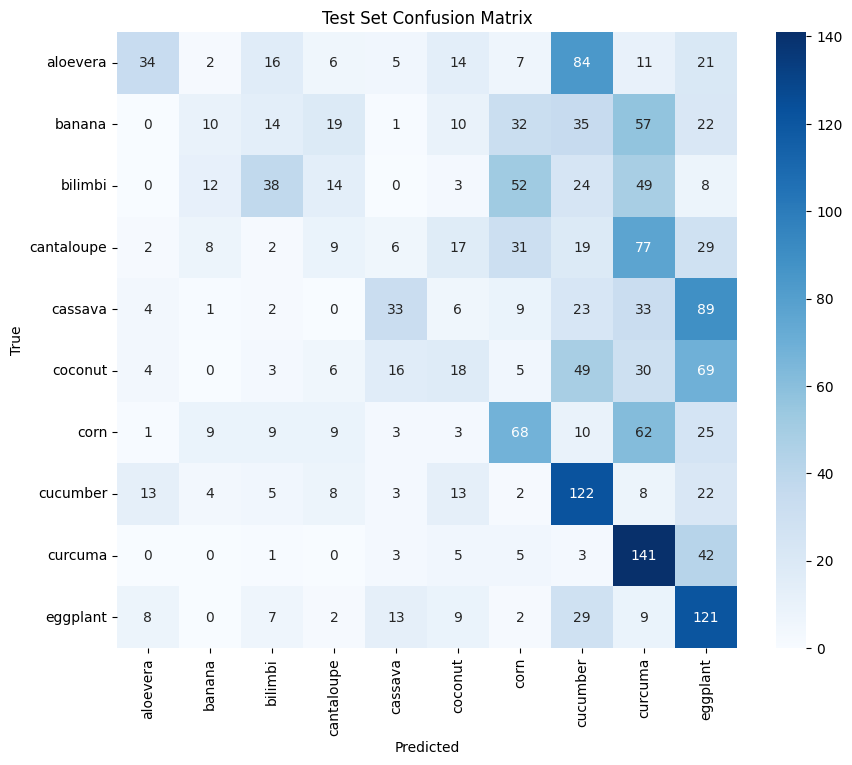

In [2]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.001)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 8.233423529039042 Accuracy train: 0.38185714285714284 loss val: 9.2743001708265 Accuracy validation:  0.315
epochs: 100 loss train: 8.057019309477063 Accuracy train: 0.3912857142857143 loss val: 9.182660664235968 Accuracy validation:  0.315
epochs: 200 loss train: 7.864655967228384 Accuracy train: 0.4025714285714286 loss val: 9.079439708525774 Accuracy validation:  0.321
epochs: 300 loss train: 7.709845640734026 Accuracy train: 0.4127142857142857 loss val: 8.99215978007602 Accuracy validation:  0.324
epochs: 400 loss train: 7.579315798155215 Accuracy train: 0.42414285714285715 loss val: 8.93918053381656 Accuracy validation:  0.33
epochs: 500 loss train: 7.430423704151427 Accuracy train: 0.43314285714285716 loss val: 8.838850361633051 Accuracy validation:  0.331
epochs: 600 loss train: 7.291561566979331 Accuracy train: 0.442 loss val: 8.727872429289132 Accuracy validation:  0.341
epochs: 700 loss train: 7.160461563066424 Accuracy train: 0.44971428571428573 loss val

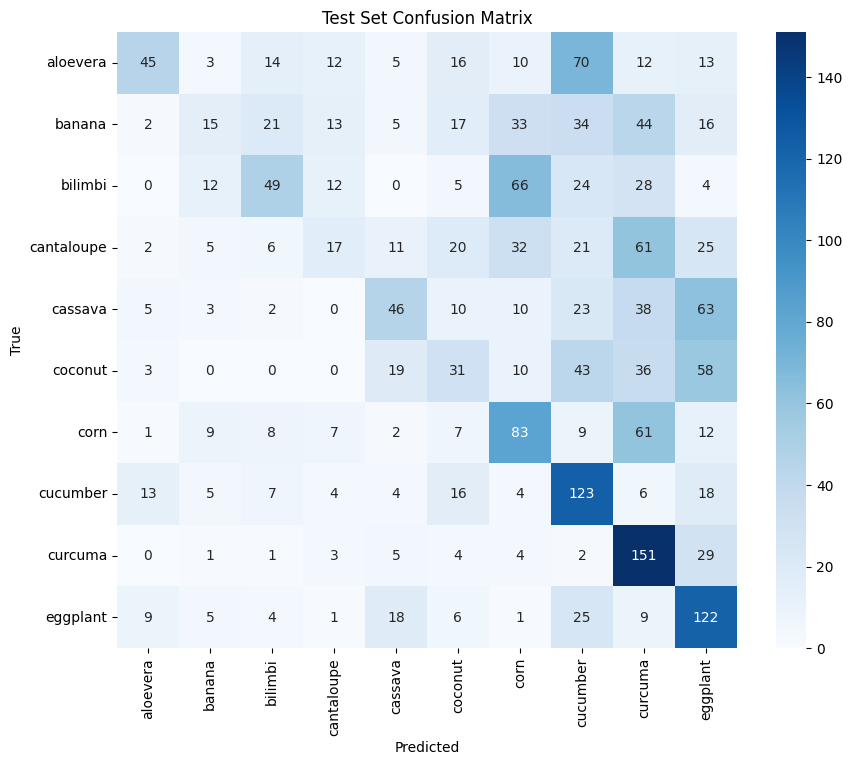

In [4]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 6.640895417763425 Accuracy train: 0.48242857142857143 loss val: 8.305347337303274 Accuracy validation:  0.366
epochs: 100 loss train: 6.512804142628136 Accuracy train: 0.49128571428571427 loss val: 8.255242281212672 Accuracy validation:  0.373
epochs: 200 loss train: 6.309730426979389 Accuracy train: 0.5032857142857143 loss val: 8.128692167386635 Accuracy validation:  0.382
epochs: 300 loss train: 6.186107025743767 Accuracy train: 0.5127142857142857 loss val: 8.065811063020318 Accuracy validation:  0.389
epochs: 400 loss train: 6.081261174304125 Accuracy train: 0.5204285714285715 loss val: 8.035615531410937 Accuracy validation:  0.39
epochs: 500 loss train: 5.93434773343265 Accuracy train: 0.5288571428571428 loss val: 7.9957697420348355 Accuracy validation:  0.394
epochs: 600 loss train: 5.8114098487107775 Accuracy train: 0.5351428571428571 loss val: 7.935171910156539 Accuracy validation:  0.397
epochs: 700 loss train: 5.750564777178636 Accuracy train: 0.539142857

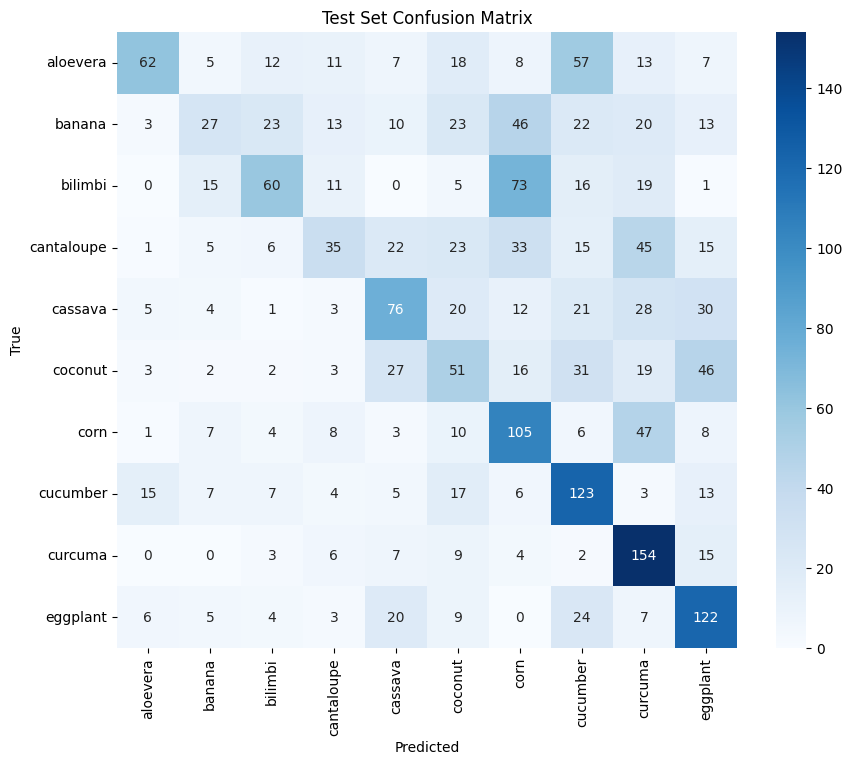

In [5]:
nn.train(x_train, y_train,x_validation, y_validation, epochs=2001,batch_size = 128)
nn.test(x_test,y_test)

In [ ]:
y_pred = nn.forward(Tensor(x_test))


class_dirs = ['aloevera','banana','bilimbi','cantaloupe','cassava','coconut','corn','cucumber','curcuma','eggplant']



y_pred = np.argmax(y_pred.data.T, 0)
y_true = np.argmax(y_test.T, 0)

for k in range(10):
    incorrect_indices = np.where((y_pred != y_true) & (y_true == k))[0]
    print(incorrect_indices)
    for i in range(15):
        if len(incorrect_indices) > 0:
            img_shape = (32, 32, 3)
            img = x_test[incorrect_indices[i]].reshape(img_shape)
            plt.imshow(img)
            plt.title(f"True label: {class_dirs[y_true[incorrect_indices[i]]]}, Predicted: {class_dirs[y_pred[incorrect_indices[i]]]}")
            plt.show()
        else:
            print("No incorrect predictions where the true label is 0.")



In [11]:
from MLP_autograd import *
nn = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.005)
nn.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn.test(x_test,y_test)

epochs: 0 loss train: 12.45975559548395 Accuracy train: 0.09785714285714285 loss val: 12.40604063848361 Accuracy validation:  0.102
epochs: 100 loss train: 10.951945615408224 Accuracy train: 0.19842857142857143 loss val: 11.513097466544686 Accuracy validation:  0.161
epochs: 200 loss train: 9.990774492728262 Accuracy train: 0.2641428571428571 loss val: 10.544071859863607 Accuracy validation:  0.227


KeyboardInterrupt: 

In [2]:
from MLP_autograd import *
nn1 = NeuralNetwork(layers_size=[32*32*3,768],activations = ["relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn2 = NeuralNetwork(layers_size=[32*32*3,768],activations = ["relu", "relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn = NeuralNetwork(layers_size=[768, 10],activations = ["softmax"],lossFunction = "crossEntropy", l_rate=0.01)
def train(x_train,y_train,x_val, y_val, epochs,nn1,nn2,nn,batch_size =128):
    for i in range(epochs):
      for j in range(0,x_train.shape[0],batch_size):
        x_train_batch = Tensor(x_train[j:j+batch_size,:], requires_grad=True)
        y_train_batch = y_train[j:j+batch_size,:]
        
        out1 = nn1.forward(x_train_batch)
        out2 = nn2.forward(x_train_batch)
        out = nn.forward(out1+out2)
        
        out.backward(y_train_batch)

        nn.update_parameter()
        nn1.update_parameter()
        nn2. update_parameter()

      if i % 100 == 0:
        (loss_train, accuracy_train) = test(x_train,y_train, nn1, nn2, nn)
        (loss_val, accuracy_val) = test(x_val,y_val, nn1, nn2, nn)
        print("epochs:", i, "loss train:", loss_train, "Accuracy train:", accuracy_train,
              "loss val:", loss_val, "Accuracy validation: ", accuracy_val)


def test(val_in, val_out, nn1, nn2, nn):
    val_in = Tensor(val_in, requires_grad= True)
    out1 = nn1.forward(val_in)
    out2 = nn2.forward(val_in)
    out = nn.forward(out1+out2)
    loss = np.mean(nn.cost(val_out, nn.lossFunction))
    return (loss, nn.get_accuracy(np.argmax(nn.A[-1].data.T, 0), np.argmax(val_out.T, 0)))

In [3]:
train(x_train,y_train,x_validation, y_validation, 1001 ,nn1,nn2,nn, batch_size =128)
test(x_test,y_test,nn1,nn2,nn)

epochs: 0 loss train: 12.43988030374728 Accuracy train: 0.09957142857142857 loss val: 12.438808338780357 Accuracy validation:  0.099
epochs: 100 loss train: 10.309795897200969 Accuracy train: 0.24414285714285713 loss val: 10.76769828513067 Accuracy validation:  0.212
epochs: 200 loss train: 8.339820118591637 Accuracy train: 0.37885714285714284 loss val: 9.181387850743906 Accuracy validation:  0.319
epochs: 300 loss train: 6.709892120236088 Accuracy train: 0.48528571428571426 loss val: 7.992683097824768 Accuracy validation:  0.403
epochs: 400 loss train: 5.131801277194657 Accuracy train: 0.5938571428571429 loss val: 7.182179177366208 Accuracy validation:  0.45
epochs: 500 loss train: 3.3618012568845272 Accuracy train: 0.7051428571428572 loss val: 6.545951631271336 Accuracy validation:  0.496
epochs: 600 loss train: 1.4711905663197922 Accuracy train: 0.8368571428571429 loss val: 5.432415990063673 Accuracy validation:  0.566
epochs: 700 loss train: 0.2710541527791061 Accuracy train: 0.937

(6.152818008397277, 0.5287643821910956)